In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../Dataset/Training/Features_Variant_1.csv')

In [3]:
column_names_updated = [
    "Page_Popularity_Likes", "Page_Checkins", "Page_Talking_About", "Page_Category",
    "Derived_1", "Derived_2", "Derived_3", "Derived_4", "Derived_5",
    "Derived_6", "Derived_7", "Derived_8", "Derived_9", "Derived_10",
    "Derived_11", "Derived_12", "Derived_13", "Derived_14", "Derived_15",
    "Derived_16", "Derived_17", "Derived_18", "Derived_19", "Derived_20",
    "Derived_21", "Derived_22", "Derived_23", "Derived_24", "Derived_25",
    "CC1_Total_Comments", "CC2_Comments_Last_24h", "CC3_Comments_48_to_24h",
    "CC4_Comments_First_24h", "CC5_CC2_CC3_Difference", "Base_Time",
    "Post_Length", "Post_Share_Count", "Post_Promotion_Status", "H_Local",
    "Published_Sunday", "Published_Monday", "Published_Tuesday",
    "Published_Wednesday", "Published_Thursday", "Published_Friday",
    "Published_Saturday", "BaseDate_Sunday", "BaseDate_Monday",
    "BaseDate_Tuesday", "BaseDate_Wednesday", "BaseDate_Thursday",
    "BaseDate_Friday", "BaseDate_Saturday", "Target_Comment_Volume"
]

data.columns = column_names_updated

In [4]:
category_mapping = {
    1: "Product/service", 2: "Public figure", 3: "Retail and consumer merchandise",
    4: "Athlete", 5: "Education website", 6: "Arts/entertainment/nightlife",
    7: "Aerospace/defense", 8: "Actor/director", 9: "Professional sports team",
    10: "Travel/leisure", 11: "Arts/humanities website", 12: "Food/beverages",
    13: "Record label", 14: "Movie", 15: "Song", 16: "Community",
    17: "Company", 18: "Artist", 19: "Non-governmental organization (NGO)",
    20: "Media/news/publishing", 21: "Cars", 22: "Clothing", 23: "Local business",
    24: "Musician/band", 25: "Politician", 26: "News/media website",
    27: "Education", 28: "Author", 29: "Sports event", 30: "Restaurant/cafe",
    31: "School sports team", 32: "University", 33: "TV show",
    34: "Website", 35: "Outdoor gear/sporting goods", 36: "Political party",
    37: "Sports league", 38: "Entertainer", 39: "Church/religious organization",
    40: "Non-profit organization", 41: "Automobiles and parts", 42: "TV channel",
    43: "Telecommunication", 44: "Entertainment website", 45: "Shopping/retail",
    46: "Personal blog", 47: "App page", 48: "Vitamins/supplements",
    49: "Professional services", 50: "Movie theater", 51: "Software",
    52: "Magazine", 53: "Electronics", 54: "School", 55: "Just for fun",
    56: "Club", 57: "Comedian", 58: "Sports venue", 59: "Sports/recreation/activities",
    60: "Publisher", 61: "TV network", 62: "Health/medical/pharmacy",
    63: "Studio", 64: "Home decor", 65: "Jewelry/watches", 66: "Writer",
    67: "Health/beauty", 68: "Music video", 69: "Appliances", 70: "Computers/technology",
    71: "Insurance company", 72: "Music award", 73: "Recreation/sports website",
    74: "Reference website", 75: "Business/economy website", 76: "Bar",
    77: "Album", 78: "Games/toys", 79: "Camera/photo", 80: "Book",
    81: "Producer", 82: "Landmark", 83: "Cause", 84: "Organization",
    85: "TV/movie award", 86: "Hotel", 87: "Health/medical/pharmaceuticals",
    88: "Transportation", 89: "Local/travel website", 90: "Musical instrument",
    91: "Radio station", 92: "Other", 93: "Computers", 94: "Phone/tablet",
    95: "Coach", 96: "Tools/equipment", 97: "Internet/software",
    98: "Bank/financial institution", 99: "Society/culture website",
    100: "Small business", 101: "News personality", 102: "Teens/kids website",
    103: "Government official", 104: "Photographer", 105: "Spas/beauty/personal care",
    106: "Video game"
}

data["Page_Category"] = data["Page_Category"].map(category_mapping)

In [5]:
data['Post_Promotion_Status'] = data['Post_Promotion_Status'].replace({0: 'No', 1: 'Yes'})

In [6]:
published_day_mapping = {
    "Published_Sunday": "Sunday",
    "Published_Monday": "Monday",
    "Published_Tuesday": "Tuesday",
    "Published_Wednesday": "Wednesday",
    "Published_Thursday": "Thursday",
    "Published_Friday": "Friday",
    "Published_Saturday": "Saturday"
}

basedate_day_mapping = {
    "BaseDate_Sunday": "Sunday",
    "BaseDate_Monday": "Monday",
    "BaseDate_Tuesday": "Tuesday",
    "BaseDate_Wednesday": "Wednesday",
    "BaseDate_Thursday": "Thursday",
    "BaseDate_Friday": "Friday",
    "BaseDate_Saturday": "Saturday"
}

data['Published_Day'] = data[[*published_day_mapping.keys()]].idxmax(axis=1).map(published_day_mapping)
data['BaseDate_Day'] = data[[*basedate_day_mapping.keys()]].idxmax(axis=1).map(basedate_day_mapping)
data.drop(columns=list(published_day_mapping.keys()) + list(basedate_day_mapping.keys()), inplace=True)
target_col = data.pop('Target_Comment_Volume')
data['Target_Comment_Volume'] = target_col

In [7]:
data.head()

,Page_Popularity_Likes,Page_Checkins,Page_Talking_About,Page_Category,Derived_1,Derived_2,Derived_3,Derived_4,Derived_5,Derived_6,...,CC4_Comments_First_24h,CC5_CC2_CC3_Difference,Base_Time,Post_Length,Post_Share_Count,Post_Promotion_Status,H_Local,Published_Day,BaseDate_Day,Target_Comment_Volume
0,634995,0,463,Product/service,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,10,132,1,No,24,Thursday,Friday,0
1,634995,0,463,Product/service,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,14,133,2,No,24,Friday,Saturday,0
2,634995,0,463,Product/service,0.0,806.0,11.291045,1.0,70.495138,0.0,...,7,-3,62,131,1,No,24,Friday,Monday,0
3,634995,0,463,Product/service,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,58,142,5,No,24,Monday,Wednesday,0
4,634995,0,463,Product/service,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,60,166,1,No,24,Tuesday,Friday,0


In [8]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,40938,40939,40940,40941,40942,40943,40944,40945,40946,40947
Page_Popularity_Likes,634995,634995,634995,634995,634995,634995,634995,634995,634995,634995,...,7170111,7170111,7170111,7170111,7170111,7170111,7170111,7170111,7170111,7170111
Page_Checkins,0,0,0,0,0,0,0,0,0,0,...,70,70,70,70,70,70,70,70,70,70
Page_Talking_About,463,463,463,463,463,463,463,463,463,463,...,497000,497000,497000,497000,497000,497000,497000,497000,497000,497000
Page_Category,Product/service,Product/service,Product/service,Product/service,Product/service,Product/service,Product/service,Product/service,Product/service,Product/service,...,Professional sports team,Professional sports team,Professional sports team,Professional sports team,Professional sports team,Professional sports team,Professional sports team,Professional sports team,Professional sports team,Professional sports team
Derived_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Derived_2,806.0,806.0,806.0,806.0,806.0,806.0,806.0,806.0,806.0,806.0,...,1881.0,1881.0,1881.0,1881.0,1881.0,1881.0,1881.0,1881.0,1881.0,1881.0
Derived_3,11.291045,11.291045,11.291045,11.291045,11.291045,11.291045,11.291045,11.291045,11.291045,11.291045,...,497.2,497.2,497.2,497.2,497.2,497.2,497.2,497.2,497.2,497.2
Derived_4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,269.0,269.0,269.0,269.0,269.0,269.0,269.0,269.0,269.0,269.0
Derived_5,70.495138,70.495138,70.495138,70.495138,70.495138,70.495138,70.495138,70.495138,70.495138,70.495138,...,502.318385,502.318385,502.318385,502.318385,502.318385,502.318385,502.318385,502.318385,502.318385,502.318385
Derived_6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40948 entries, 0 to 40947
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Page_Popularity_Likes   40948 non-null  int64  
 1   Page_Checkins           40948 non-null  int64  
 2   Page_Talking_About      40948 non-null  int64  
 3   Page_Category           40948 non-null  object 
 4   Derived_1               40948 non-null  float64
 5   Derived_2               40948 non-null  float64
 6   Derived_3               40948 non-null  float64
 7   Derived_4               40948 non-null  float64
 8   Derived_5               40948 non-null  float64
 9   Derived_6               40948 non-null  float64
 10  Derived_7               40948 non-null  float64
 11  Derived_8               40948 non-null  float64
 12  Derived_9               40948 non-null  float64
 13  Derived_10              40948 non-null  float64
 14  Derived_11              40948 non-null

In [10]:
data.isnull().sum()

Page_Popularity_Likes     0
Page_Checkins             0
Page_Talking_About        0
Page_Category             0
Derived_1                 0
Derived_2                 0
Derived_3                 0
Derived_4                 0
Derived_5                 0
Derived_6                 0
Derived_7                 0
Derived_8                 0
Derived_9                 0
Derived_10                0
Derived_11                0
Derived_12                0
Derived_13                0
Derived_14                0
Derived_15                0
Derived_16                0
Derived_17                0
Derived_18                0
Derived_19                0
Derived_20                0
Derived_21                0
Derived_22                0
Derived_23                0
Derived_24                0
Derived_25                0
CC1_Total_Comments        0
CC2_Comments_Last_24h     0
CC3_Comments_48_to_24h    0
CC4_Comments_First_24h    0
CC5_CC2_CC3_Difference    0
Base_Time                 0
Post_Length         

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Page_Popularity_Likes,40948.0,1.313830e+06,6.785834e+06,36.0,36734.000000,292911.000000,1.204214e+06,4.869723e+08
Page_Checkins,40948.0,4.676248e+03,2.059342e+04,0.0,0.000000,0.000000,9.900000e+01,1.863700e+05
Page_Talking_About,40948.0,4.480133e+04,1.109349e+05,0.0,698.000000,7141.000000,5.026400e+04,6.089942e+06
Derived_1,40948.0,1.586280e+00,2.075343e+01,0.0,0.000000,0.000000,0.000000e+00,2.341000e+03
Derived_2,40948.0,4.433250e+02,4.966980e+02,0.0,45.000000,241.000000,7.170000e+02,2.341000e+03
Derived_3,40948.0,5.572147e+01,8.693433e+01,0.0,5.527273,23.374101,7.182883e+01,2.341000e+03
Derived_4,40948.0,3.564638e+01,6.996088e+01,0.0,2.000000,12.000000,4.200000e+01,2.341000e+03
Derived_5,40948.0,6.746408e+01,8.156924e+01,0.0,8.278756,35.069140,1.025550e+02,7.313946e+02
Derived_6,40948.0,2.194735e-01,1.005527e+01,0.0,0.000000,0.000000,0.000000e+00,1.923000e+03
Derived_7,40948.0,2.851747e+02,3.744375e+02,0.0,26.000000,118.000000,4.050000e+02,2.079000e+03


In [12]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Page_Category', 'Post_Promotion_Status', 'Published_Day',
       'BaseDate_Day'],
      dtype='object')
Numerical Variables:
['Page_Popularity_Likes', 'Page_Checkins', 'Page_Talking_About', 'Derived_1', 'Derived_2', 'Derived_3', 'Derived_4', 'Derived_5', 'Derived_6', 'Derived_7', 'Derived_8', 'Derived_9', 'Derived_10', 'Derived_11', 'Derived_12', 'Derived_13', 'Derived_14', 'Derived_15', 'Derived_16', 'Derived_17', 'Derived_18', 'Derived_19', 'Derived_20', 'Derived_21', 'Derived_22', 'Derived_23', 'Derived_24', 'Derived_25', 'CC1_Total_Comments', 'CC2_Comments_Last_24h', 'CC3_Comments_48_to_24h', 'CC4_Comments_First_24h', 'CC5_CC2_CC3_Difference', 'Base_Time', 'Post_Length', 'Post_Share_Count', 'H_Local', 'Target_Comment_Volume']


Page_Popularity_Likes
Skew : 56.09


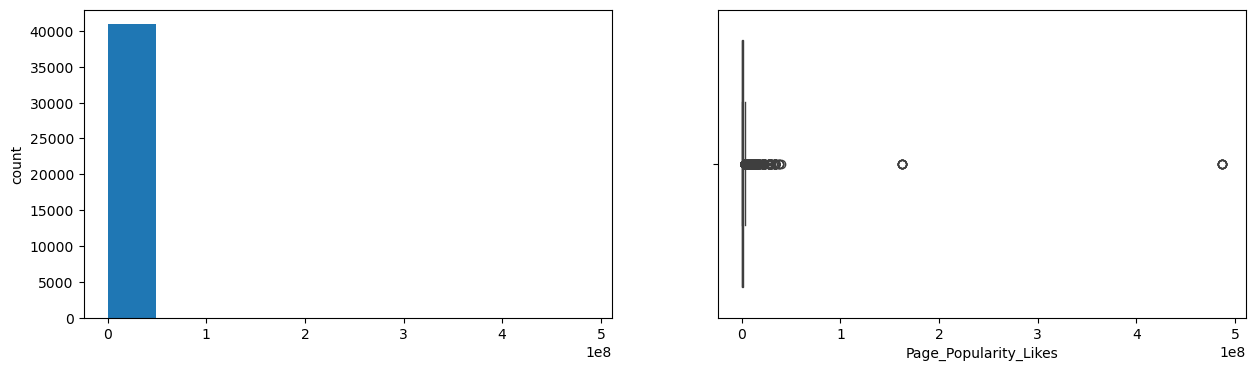

Page_Checkins
Skew : 6.21


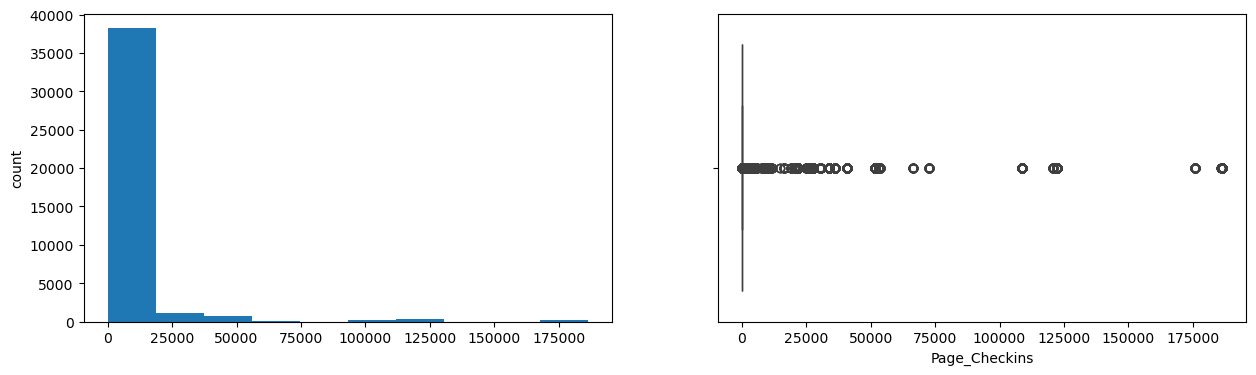

Page_Talking_About
Skew : 14.24


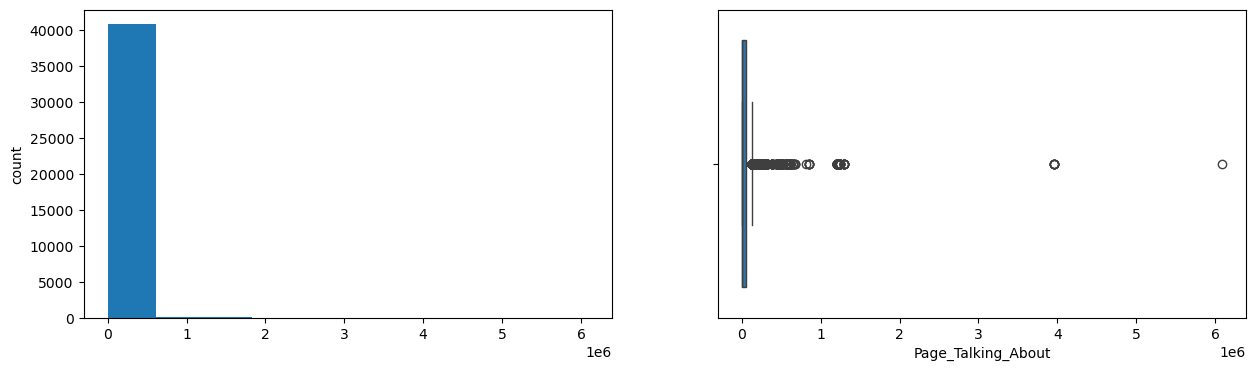

Derived_1
Skew : 63.06


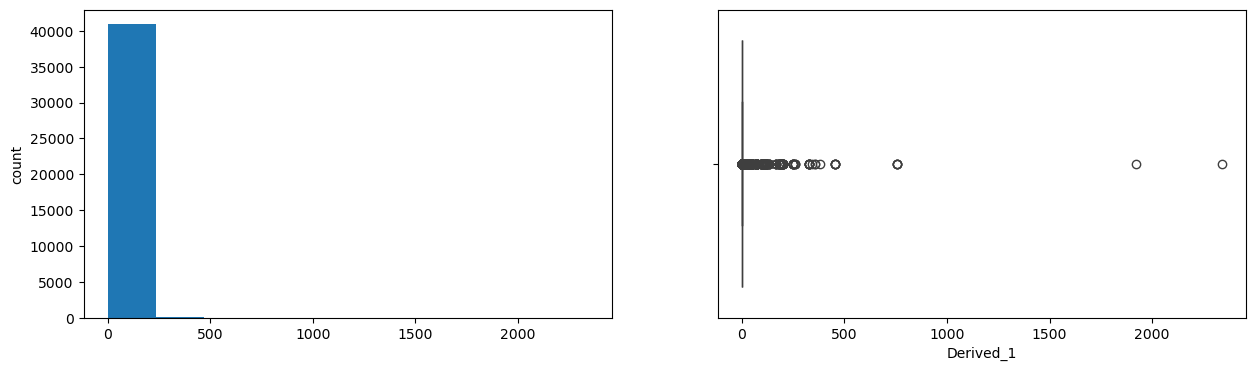

Derived_2
Skew : 1.36


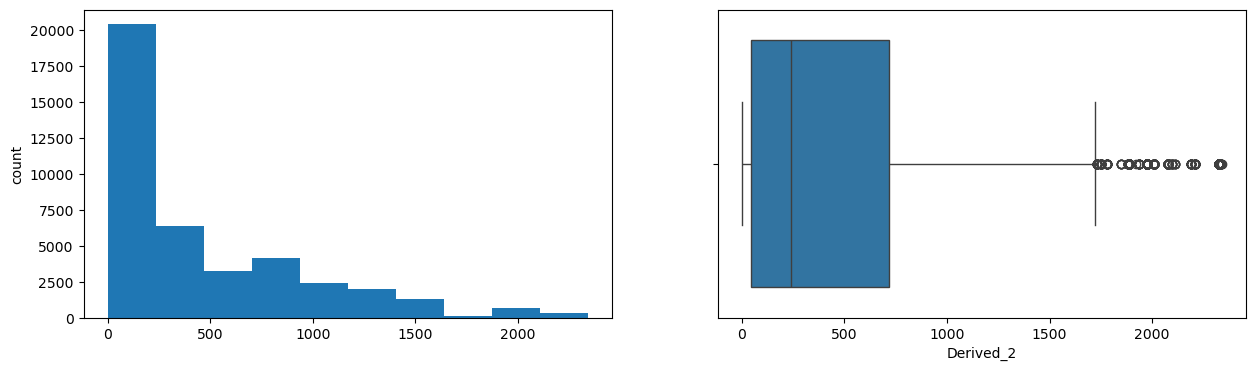

Derived_3
Skew : 4.73


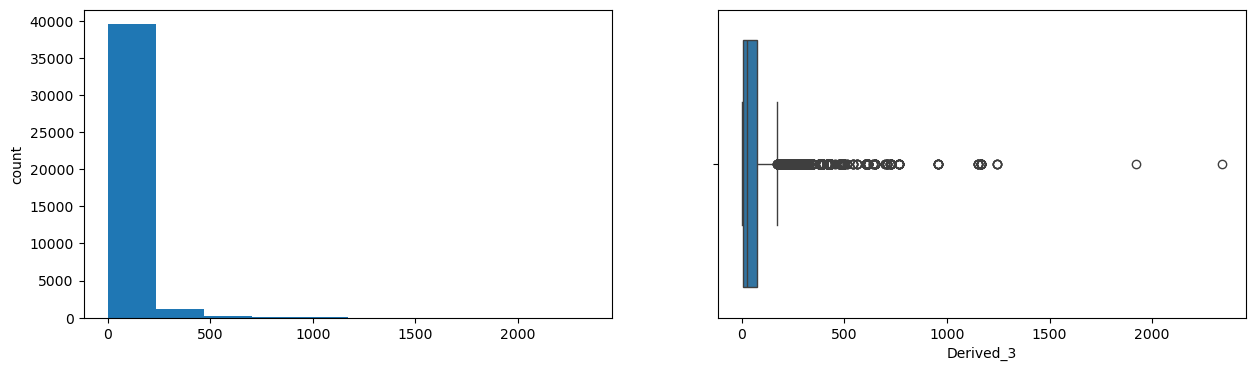

Derived_4
Skew : 7.51


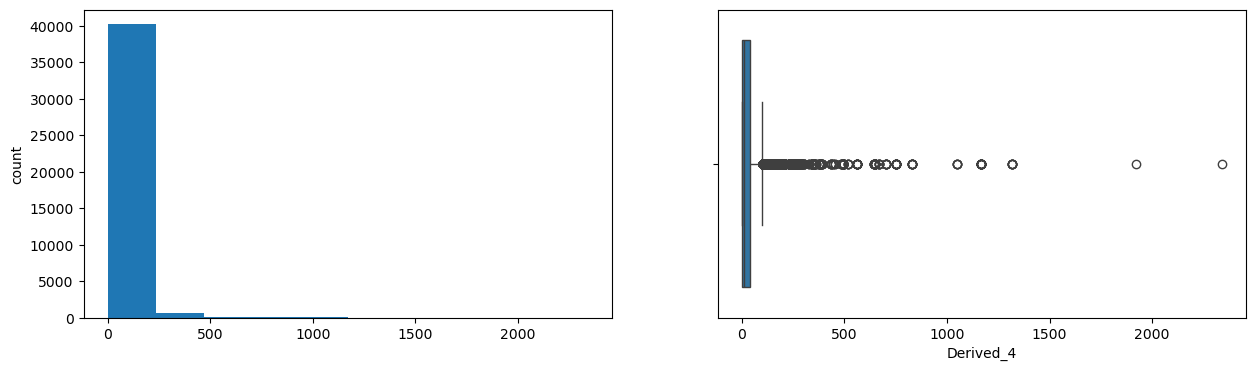

Derived_5
Skew : 2.01


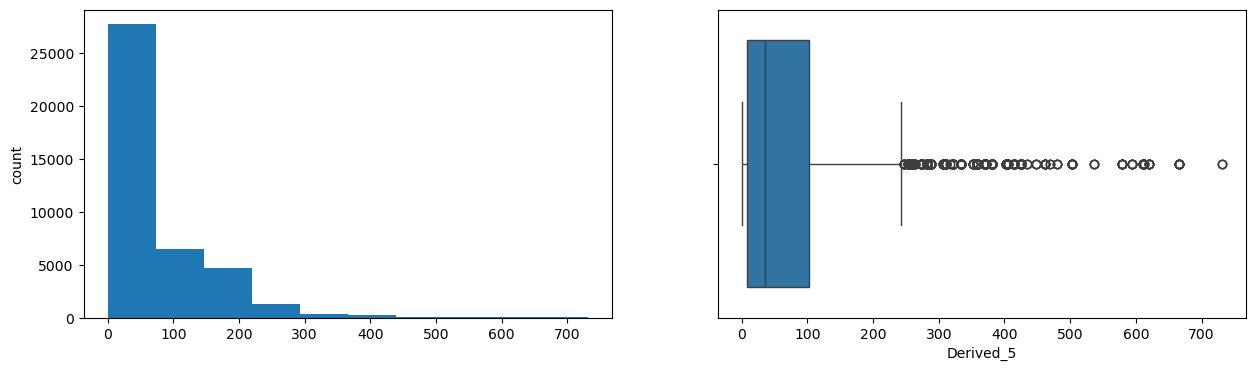

Derived_6
Skew : 172.61


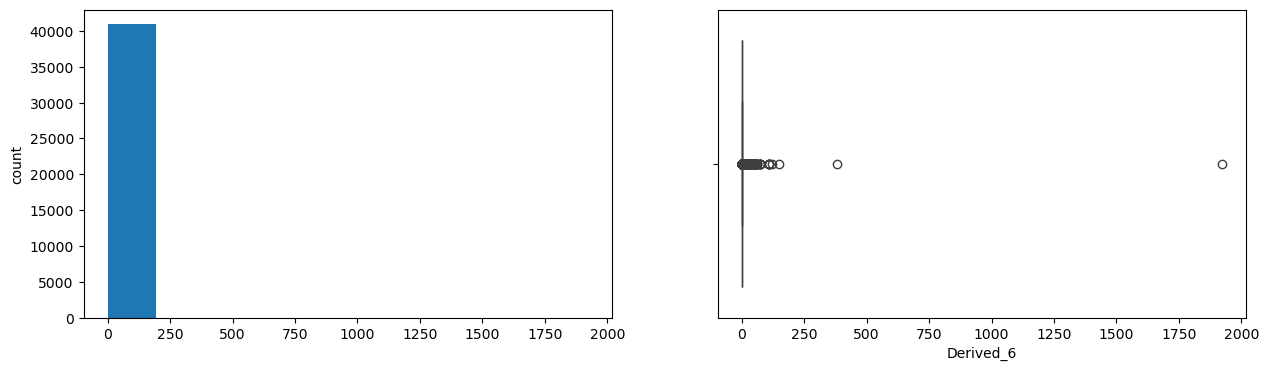

Derived_7
Skew : 1.95


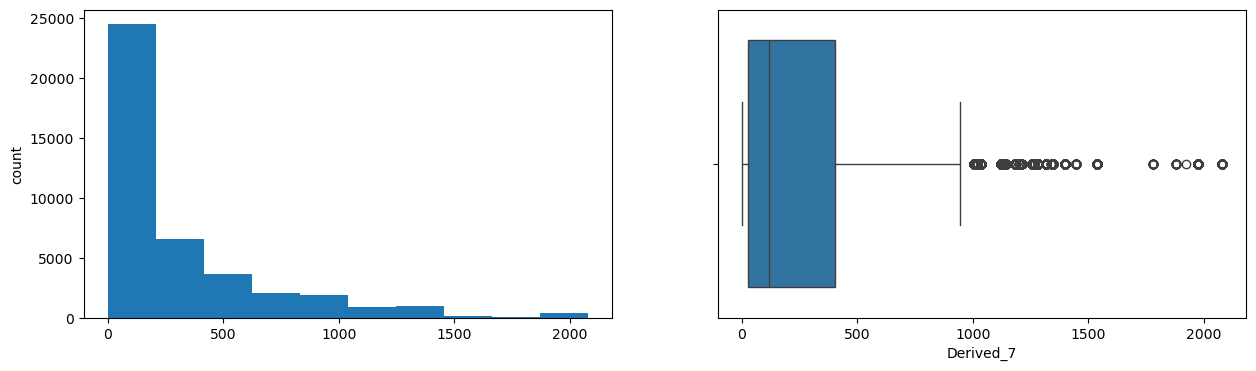

Derived_8
Skew : 7.33


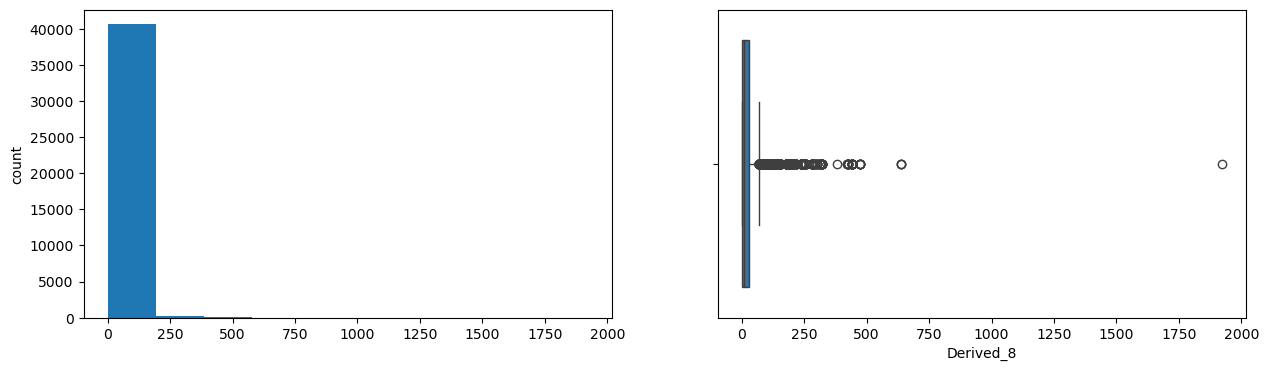

Derived_9
Skew : 25.18


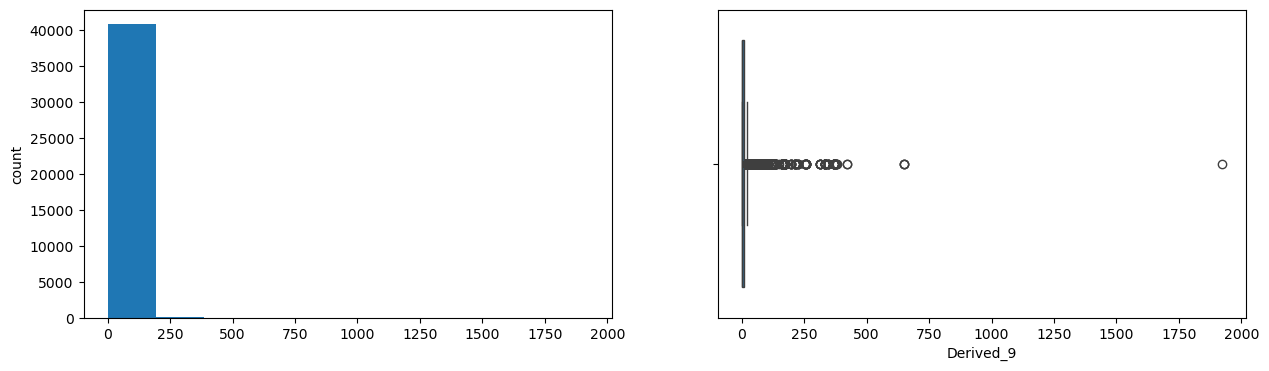

Derived_10
Skew : 2.46


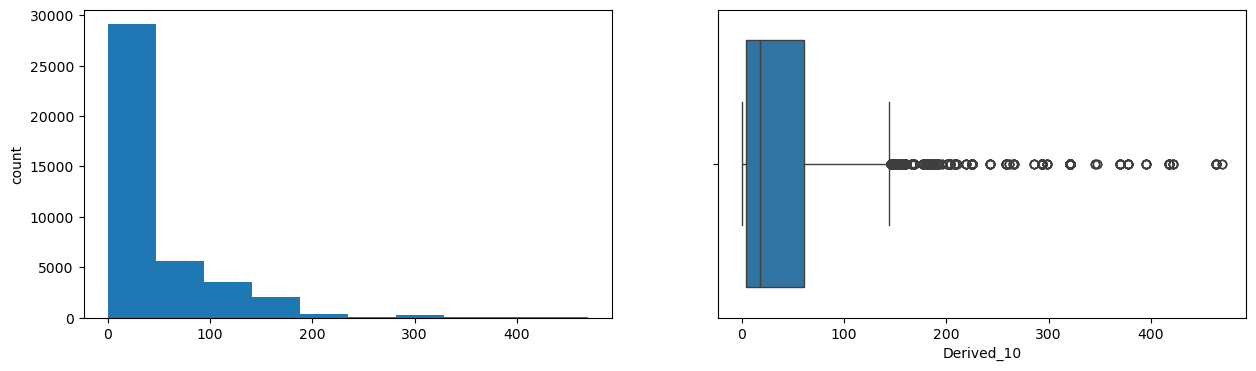

Derived_11
Skew : 131.45


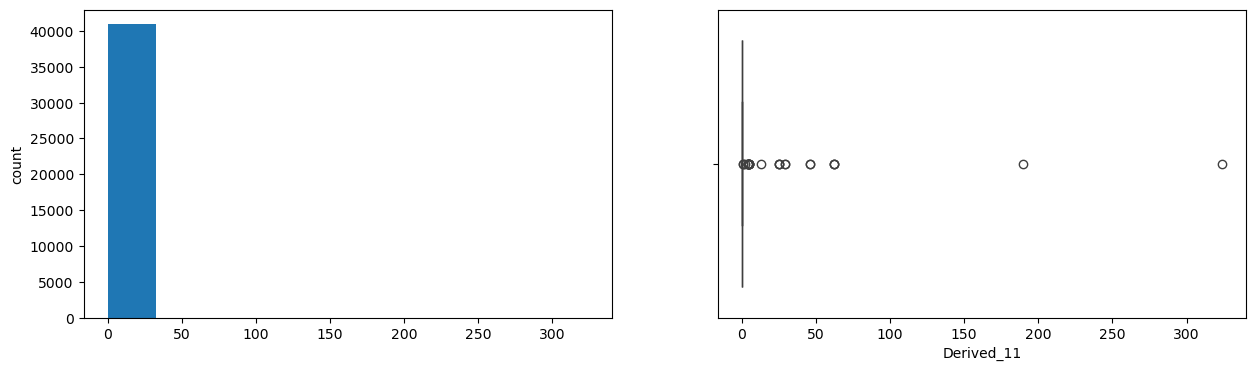

Derived_12
Skew : 1.57


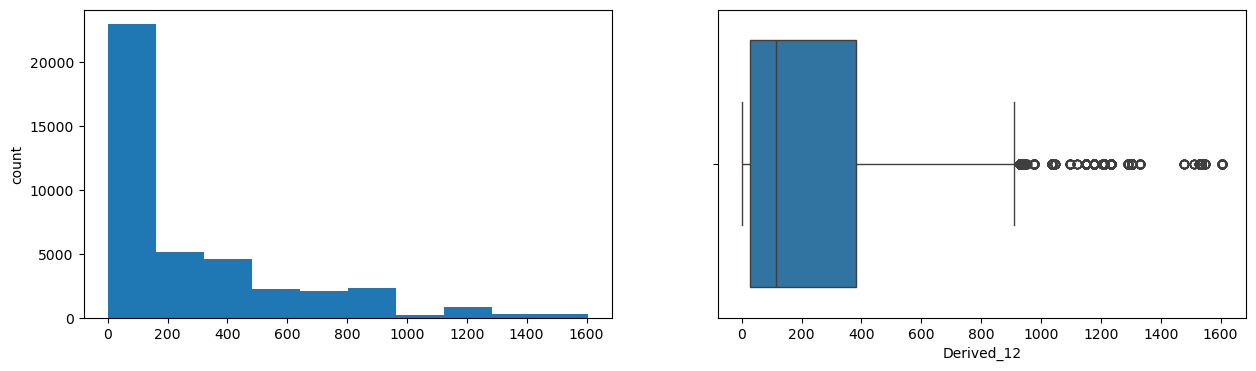

Derived_13
Skew : 4.62


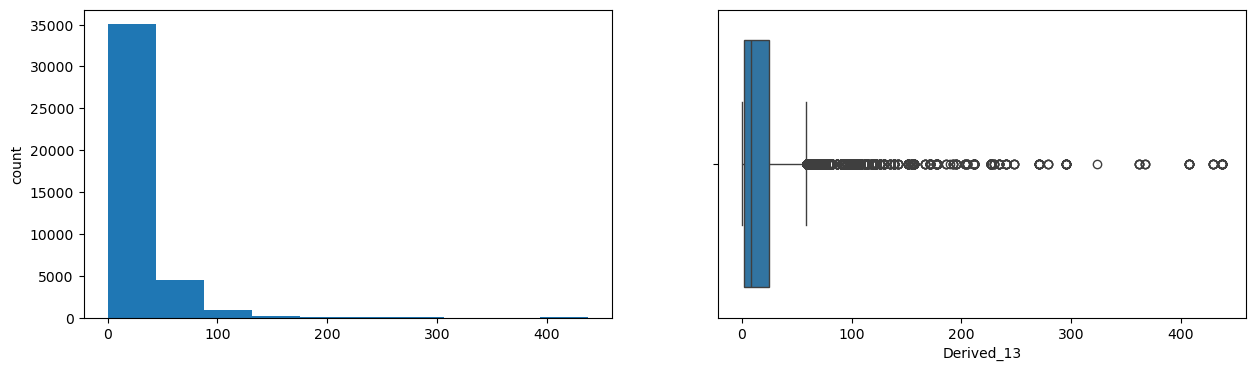

Derived_14
Skew : 13.45


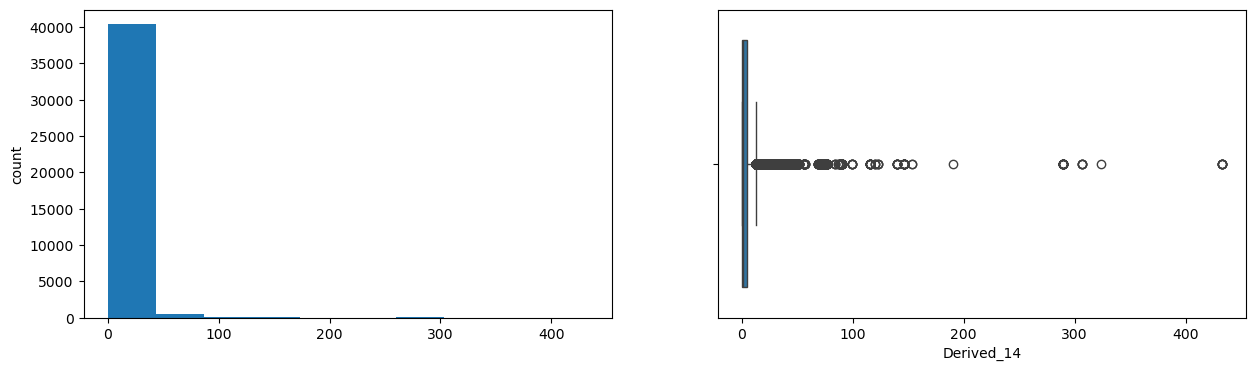

Derived_15
Skew : 2.69


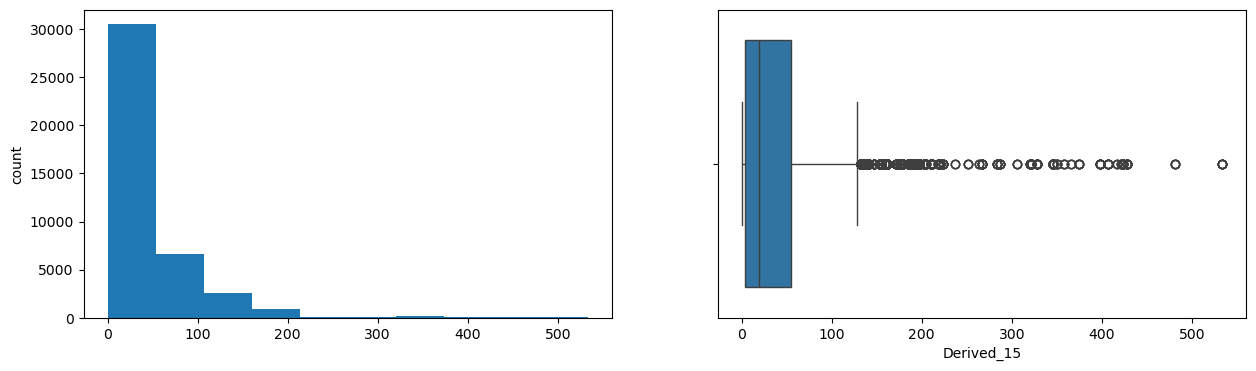

Derived_16
Skew : 59.83


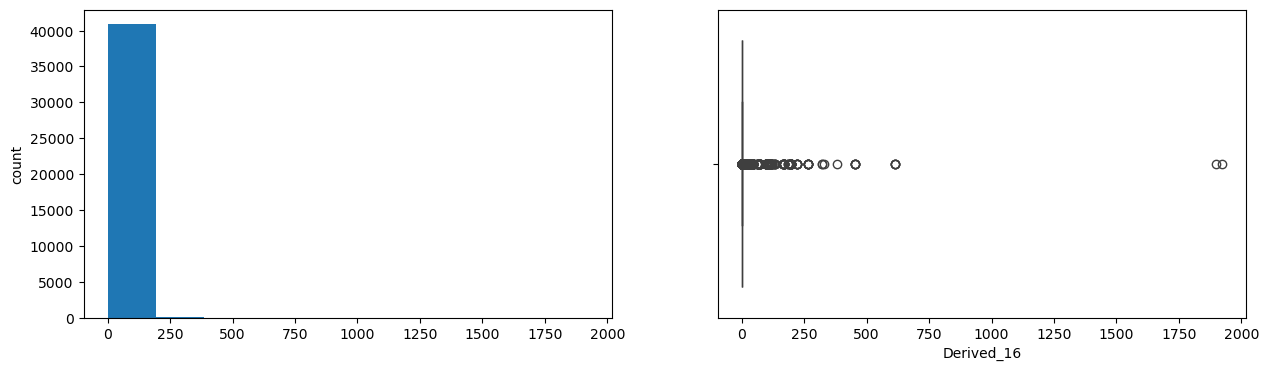

Derived_17
Skew : 1.41


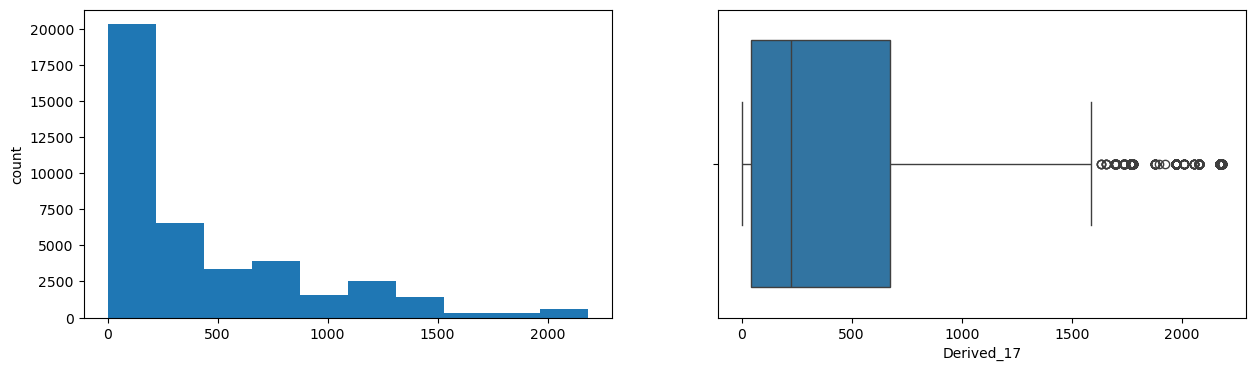

Derived_18
Skew : 4.42


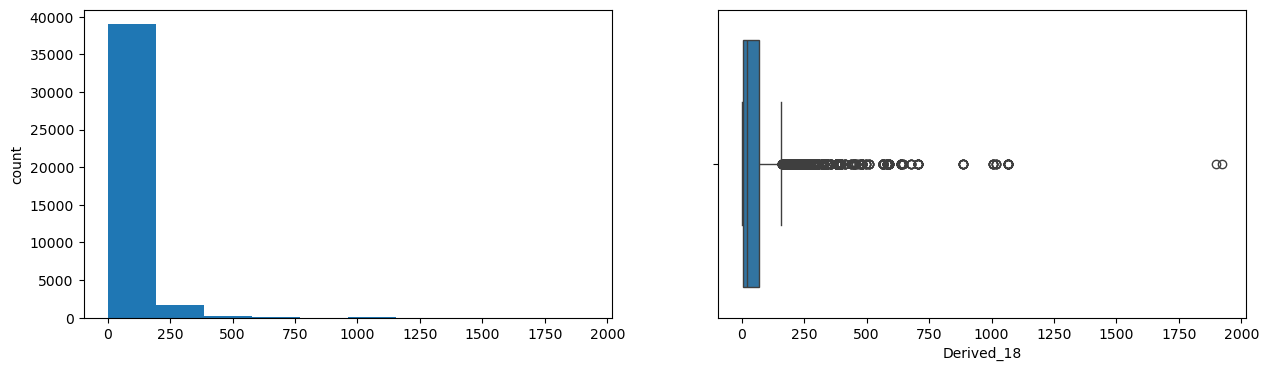

Derived_19
Skew : 7.03


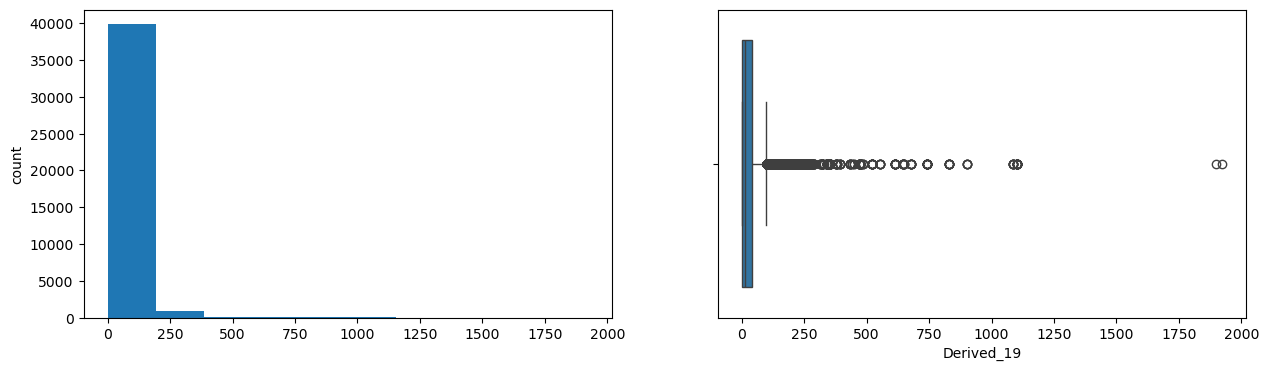

Derived_20
Skew : 1.91


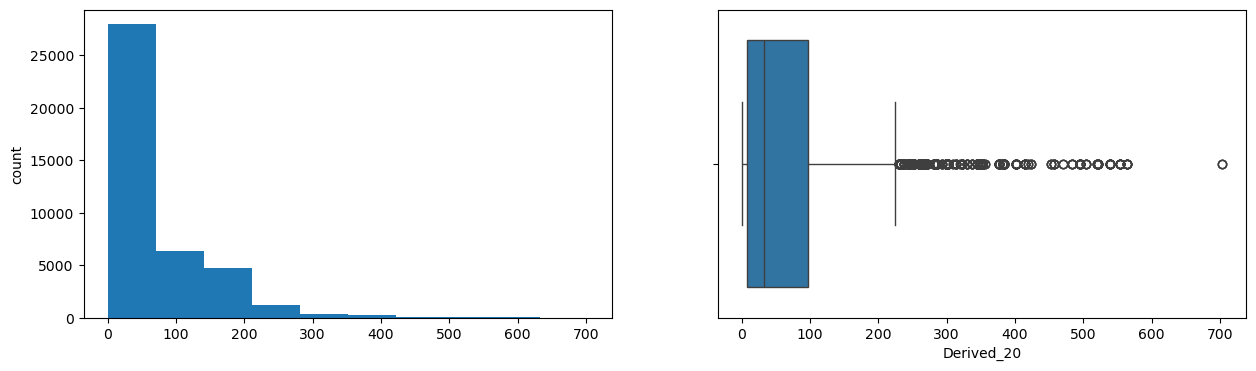

Derived_21
Skew : -1.71


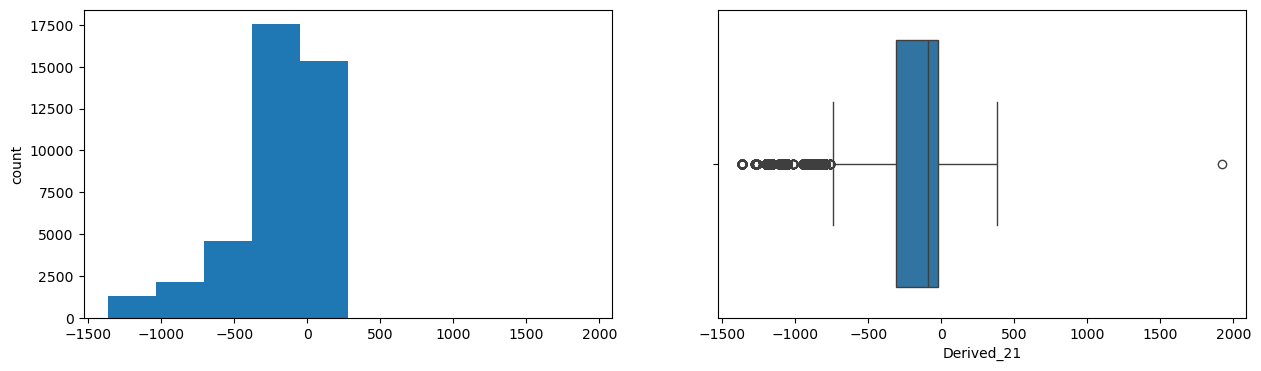

Derived_22
Skew : 2.02


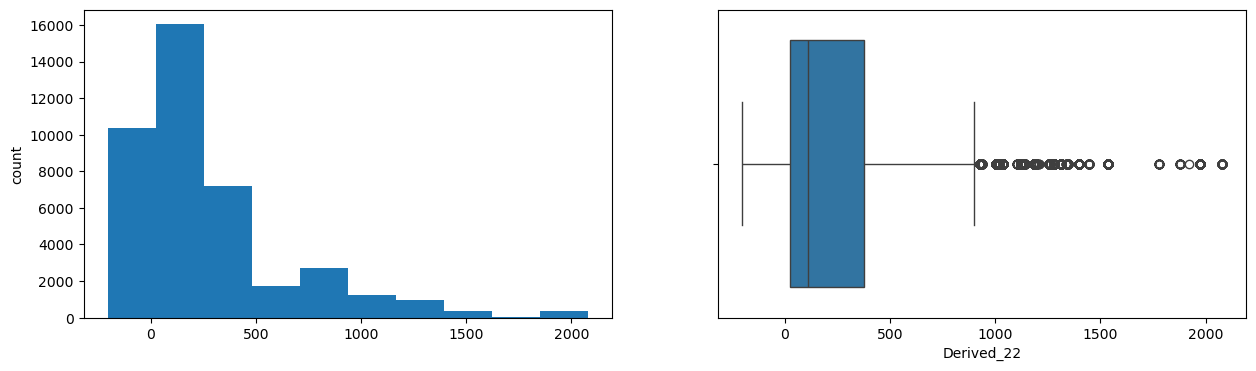

Derived_23
Skew : 37.4


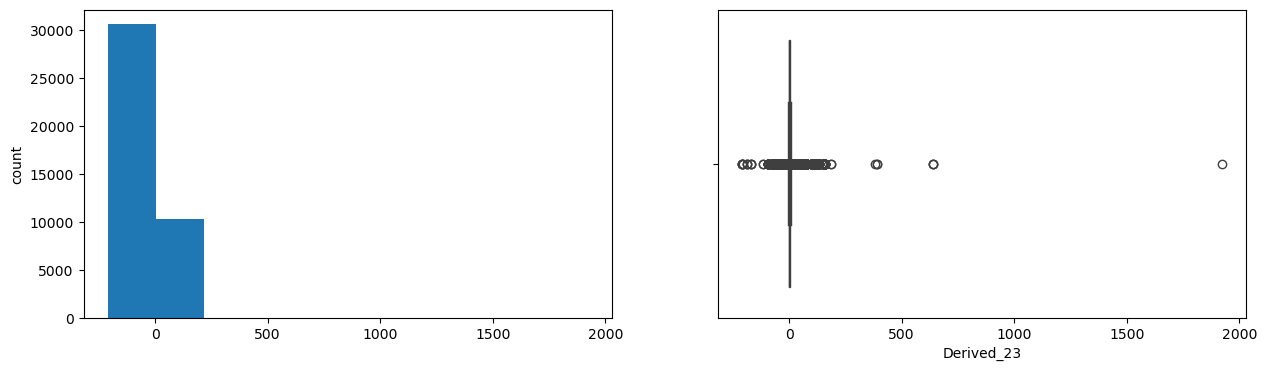

Derived_24
Skew : 61.93


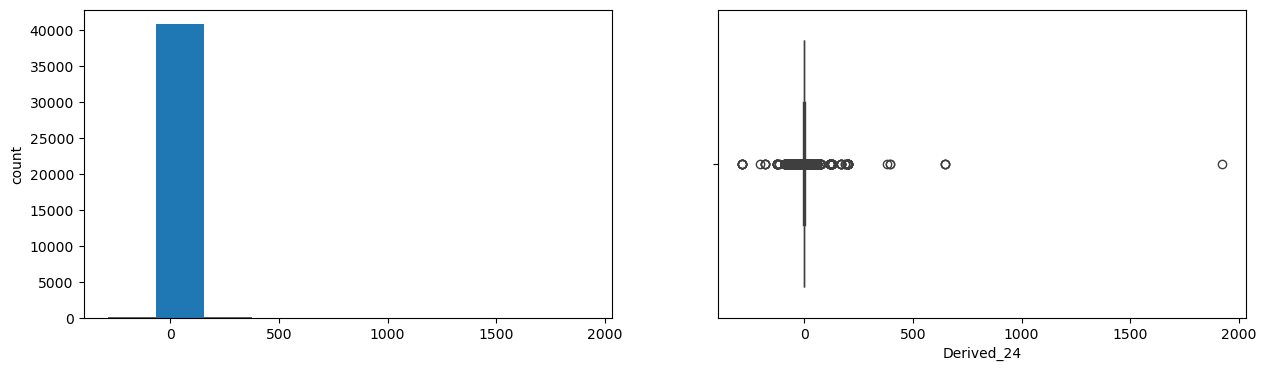

Derived_25
Skew : 2.52


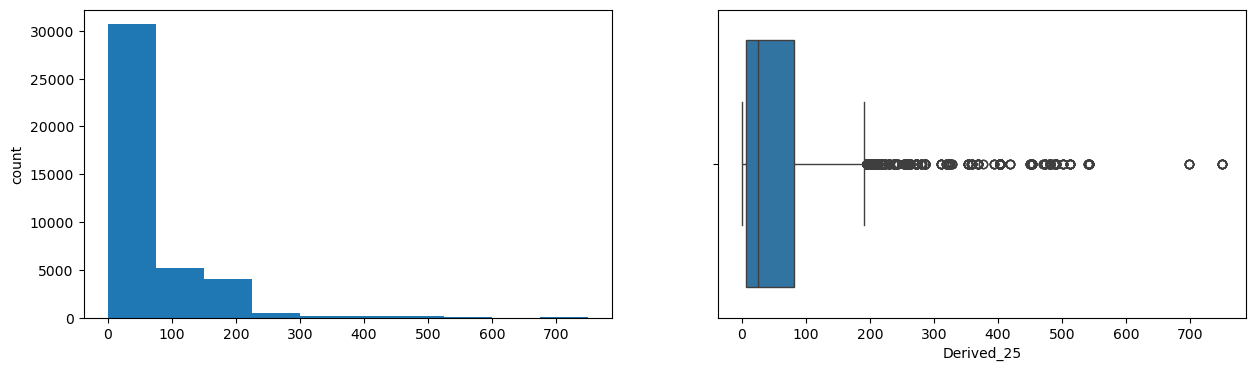

CC1_Total_Comments
Skew : 6.08


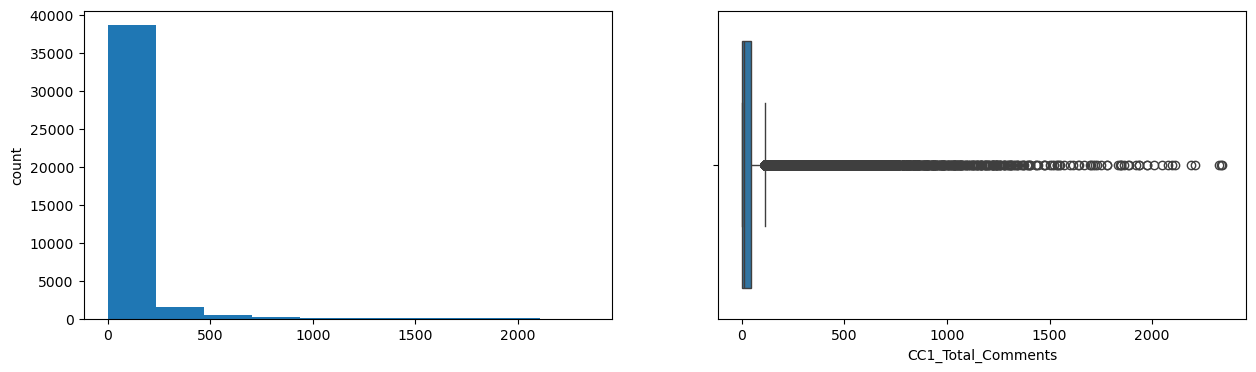

CC2_Comments_Last_24h
Skew : 9.23


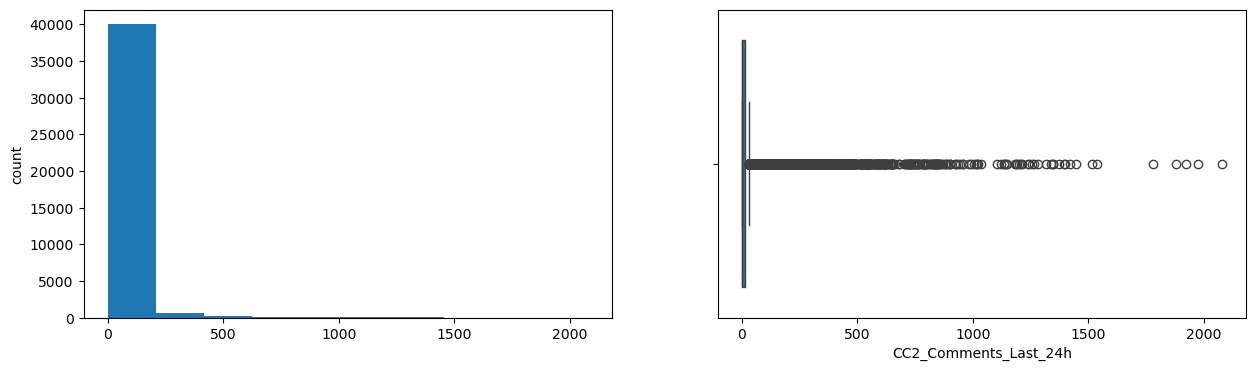

CC3_Comments_48_to_24h
Skew : 8.82


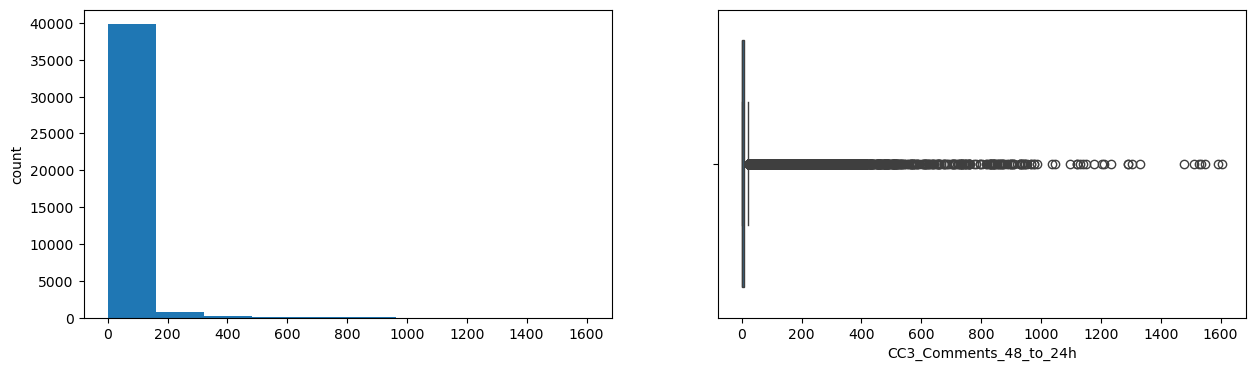

CC4_Comments_First_24h
Skew : 5.94


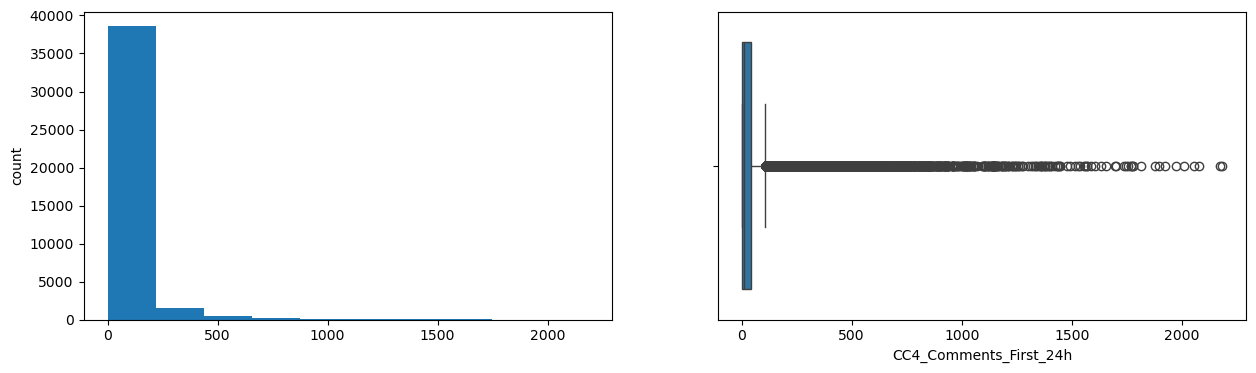

CC5_CC2_CC3_Difference
Skew : 2.86


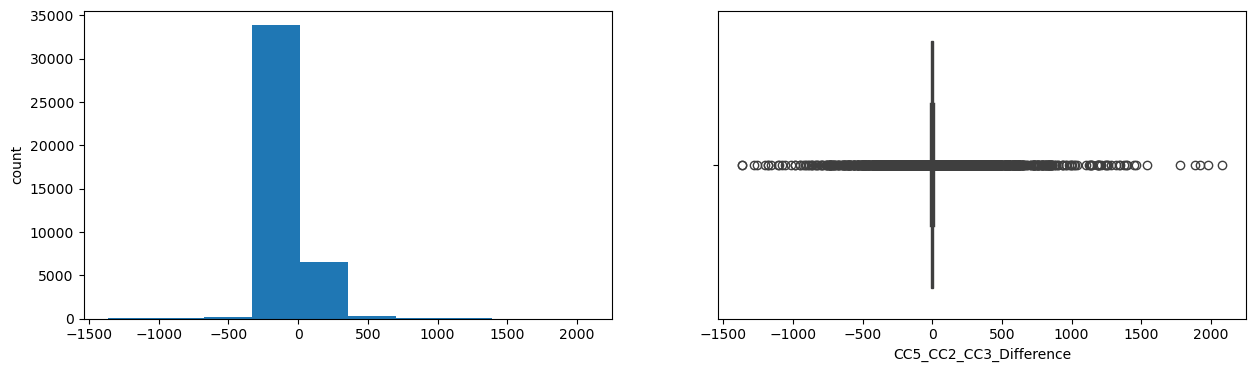

Base_Time
Skew : 0.04


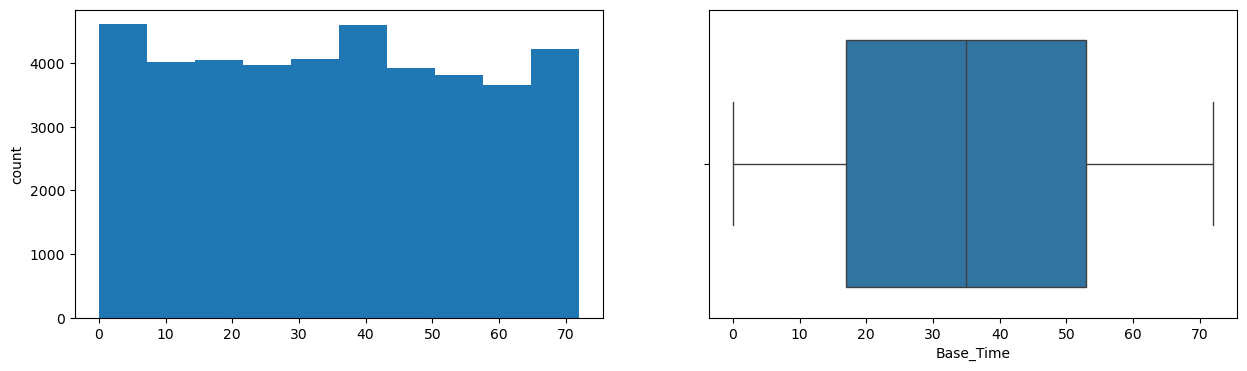

Post_Length
Skew : 19.59


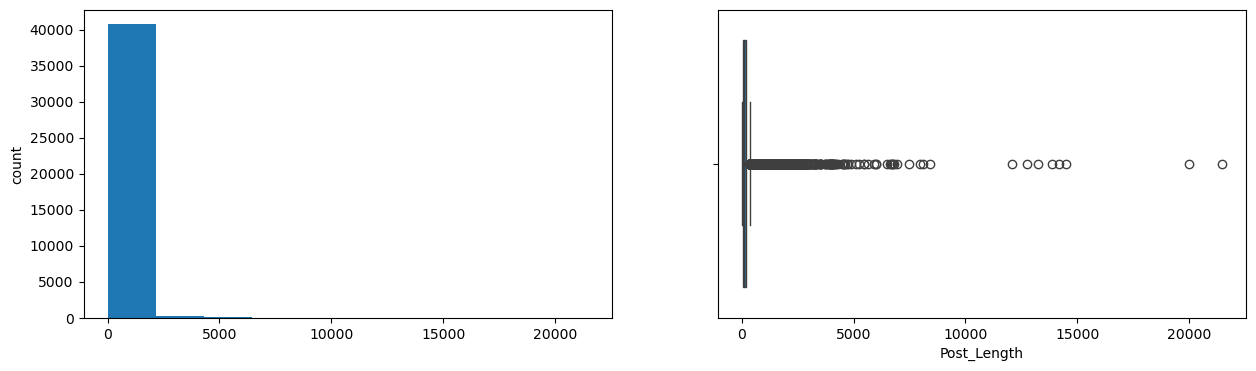

Post_Share_Count
Skew : 103.63


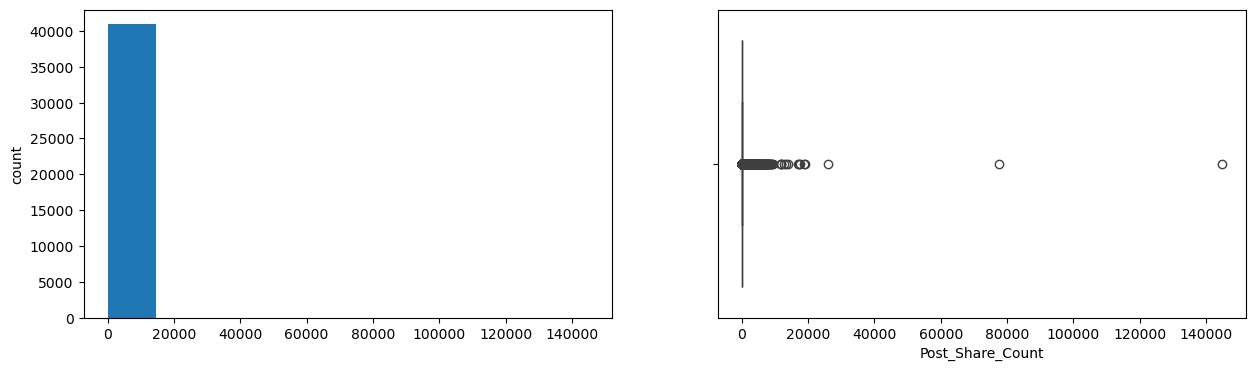

H_Local
Skew : -9.22


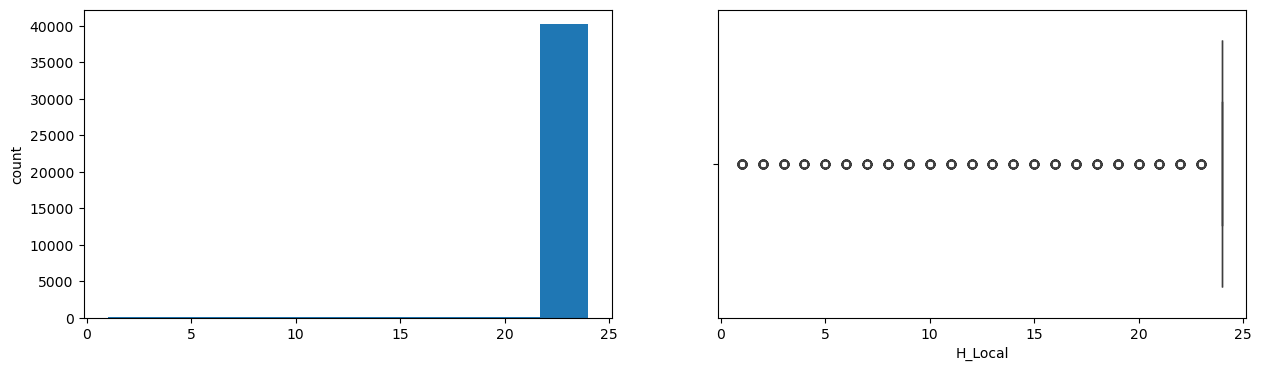

Target_Comment_Volume
Skew : 14.29


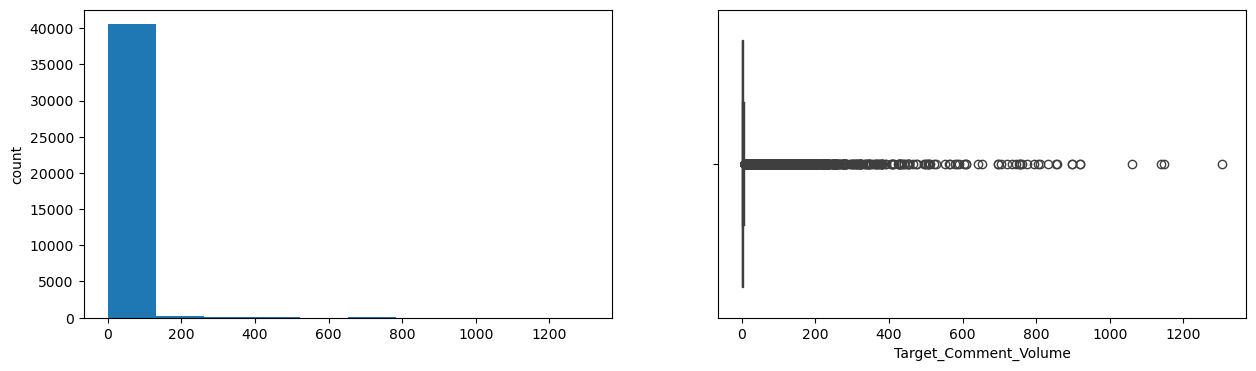

In [13]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

In [14]:
outlier_page_popularity = data[data["Page_Popularity_Likes"] > 100000000]
outlier_page_popularity.T

,672,673,674,675,676,677,26287,26288,26289,26290,26291,26292
Page_Popularity_Likes,162624443,162624443,162624443,162624443,162624443,162624443,486972297,486972297,486972297,486972297,486972297,486972297
Page_Checkins,0,0,0,0,0,0,2,2,2,2,2,2
Page_Talking_About,1242488,1242488,1242488,1242488,1242488,1242488,3959779,3959779,3959779,3959779,3959779,3959779
Page_Category,Product/service,Product/service,Product/service,Product/service,Product/service,Product/service,App page,App page,App page,App page,App page,App page
Derived_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Derived_2,299.0,299.0,299.0,299.0,299.0,299.0,0.0,0.0,0.0,0.0,0.0,0.0
Derived_3,85.333333,85.333333,85.333333,85.333333,85.333333,85.333333,0.0,0.0,0.0,0.0,0.0,0.0
Derived_4,48.5,48.5,48.5,48.5,48.5,48.5,0.0,0.0,0.0,0.0,0.0,0.0
Derived_5,99.620391,99.620391,99.620391,99.620391,99.620391,99.620391,0.0,0.0,0.0,0.0,0.0,0.0
Derived_6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
outlier_share_count = data[data["Post_Share_Count"] > 40000]
outlier_share_count

,Page_Popularity_Likes,Page_Checkins,Page_Talking_About,Page_Category,Derived_1,Derived_2,Derived_3,Derived_4,Derived_5,Derived_6,...,CC4_Comments_First_24h,CC5_CC2_CC3_Difference,Base_Time,Post_Length,Post_Share_Count,Post_Promotion_Status,H_Local,Published_Day,BaseDate_Day,Target_Comment_Volume
26292,486972297,2,3959779,App page,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,15,174,77625,No,24,Thursday,Friday,0
30606,39534164,0,6089942,Entertainer,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,25,519,144860,No,24,Sunday,Tuesday,0


In [16]:
outlier_post_length = data[data["Post_Length"] > 10000]
outlier_post_length

# They are oulier but if post lenght increases, comment volume decrease. Thus, it can be normal

,Page_Popularity_Likes,Page_Checkins,Page_Talking_About,Page_Category,Derived_1,Derived_2,Derived_3,Derived_4,Derived_5,Derived_6,...,CC4_Comments_First_24h,CC5_CC2_CC3_Difference,Base_Time,Post_Length,Post_Share_Count,Post_Promotion_Status,H_Local,Published_Day,BaseDate_Day,Target_Comment_Volume
1480,517146,0,19179,Politician,36.0,498.0,220.235294,200.5,120.679707,1.0,...,171,-85,37,21480,55,No,24,Saturday,Sunday,8
5976,3611,0,16,Shopping/retail,0.0,3.0,0.244898,0.0,0.655607,0.0,...,0,-1,56,12081,1,No,24,Sunday,Wednesday,0
6508,1422427,0,35610,Professional sports team,0.0,206.0,33.421622,20.0,38.486299,0.0,...,187,-8,68,12759,214,No,24,Tuesday,Friday,1
14651,192885,1,2647,Musician/band,0.0,67.0,16.791045,13.0,12.508549,0.0,...,0,0,41,13246,2,No,24,Thursday,Saturday,0
15100,96918,100,4495,Actor/director,0.0,158.0,14.578313,8.0,24.760599,0.0,...,27,-25,48,13893,51,No,24,Wednesday,Friday,3
17900,14691,0,4072,Community,0.0,633.0,31.202247,9.0,78.308835,0.0,...,0,0,9,20016,3,No,24,Saturday,Sunday,0
22874,9774,0,2397,Community,0.0,57.0,2.609589,1.0,6.082057,0.0,...,3,1,26,14497,11,No,24,Friday,Saturday,1
22900,9774,0,2397,Community,0.0,57.0,2.609589,1.0,6.082057,0.0,...,1,0,62,14185,1,No,24,Monday,Thursday,0


In [17]:
outlier_page_checkins = data[data["Page_Checkins"] > 150000]
outlier_page_checkins

# Maybe it is not outlier 255 rows is high number

,Page_Popularity_Likes,Page_Checkins,Page_Talking_About,Page_Category,Derived_1,Derived_2,Derived_3,Derived_4,Derived_5,Derived_6,...,CC4_Comments_First_24h,CC5_CC2_CC3_Difference,Base_Time,Post_Length,Post_Share_Count,Post_Promotion_Status,H_Local,Published_Day,BaseDate_Day,Target_Comment_Volume
17148,2289651,185932,119581,Professional sports team,9.0,157.0,58.333333,57.5,43.536064,2.0,...,22,22,10,93,25,No,24,Monday,Tuesday,8
17149,2289651,185932,119581,Professional sports team,9.0,157.0,58.333333,57.5,43.536064,2.0,...,157,157,6,147,315,No,24,Monday,Tuesday,58
17150,2289651,185932,119581,Professional sports team,9.0,157.0,58.333333,57.5,43.536064,2.0,...,46,-26,44,360,47,No,24,Tuesday,Wednesday,1
17151,2289651,185932,119581,Professional sports team,9.0,157.0,58.333333,57.5,43.536064,2.0,...,67,67,20,108,192,No,24,Tuesday,Wednesday,6
17152,2289651,185932,119581,Professional sports team,9.0,157.0,58.333333,57.5,43.536064,2.0,...,60,-57,43,364,25,No,15,Wednesday,Thursday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40674,1009493,175714,47503,Professional sports team,0.0,374.0,54.284211,24.0,73.187238,0.0,...,38,38,14,60,2,No,24,Tuesday,Tuesday,5
40675,1009493,175714,47503,Professional sports team,0.0,374.0,54.284211,24.0,73.187238,0.0,...,307,-22,60,37,1266,No,5,Tuesday,Friday,1
40676,1009493,175714,47503,Professional sports team,0.0,374.0,54.284211,24.0,73.187238,0.0,...,305,-127,54,124,612,No,4,Wednesday,Friday,1
40677,1009493,175714,47503,Professional sports team,0.0,374.0,54.284211,24.0,73.187238,0.0,...,20,-18,34,130,17,No,21,Wednesday,Thursday,2


In [18]:
outlier_page_talking_about = data[data["Page_Talking_About"] > 3000000]
outlier_page_talking_about

# 1-6th rows are seen in outlier_page_popularity
# 7th row is seen in outlier_share_count

,Page_Popularity_Likes,Page_Checkins,Page_Talking_About,Page_Category,Derived_1,Derived_2,Derived_3,Derived_4,Derived_5,Derived_6,...,CC4_Comments_First_24h,CC5_CC2_CC3_Difference,Base_Time,Post_Length,Post_Share_Count,Post_Promotion_Status,H_Local,Published_Day,BaseDate_Day,Target_Comment_Volume
26287,486972297,2,3959779,App page,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,24,321,3050,No,24,Saturday,Sunday,0
26288,486972297,2,3959779,App page,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,45,322,5604,No,24,Saturday,Monday,0
26289,486972297,2,3959779,App page,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,11,161,13403,No,24,Monday,Monday,0
26290,486972297,2,3959779,App page,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,10,210,26143,No,24,Tuesday,Wednesday,0
26291,486972297,2,3959779,App page,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,46,197,17295,No,24,Tuesday,Thursday,0
26292,486972297,2,3959779,App page,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,15,174,77625,No,24,Thursday,Friday,0
30606,39534164,0,6089942,Entertainer,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,25,519,144860,No,24,Sunday,Tuesday,0


In [19]:
outlier_derived_1 = data[data["Derived_1"] > 1500]
outlier_derived_1

,Page_Popularity_Likes,Page_Checkins,Page_Talking_About,Page_Category,Derived_1,Derived_2,Derived_3,Derived_4,Derived_5,Derived_6,...,CC4_Comments_First_24h,CC5_CC2_CC3_Difference,Base_Time,Post_Length,Post_Share_Count,Post_Promotion_Status,H_Local,Published_Day,BaseDate_Day,Target_Comment_Volume
3526,2522433,0,239250,Artist,1923.0,1923.0,1923.0,1923.0,0.0,1923.0,...,1923,1923,19,57,442,No,24,Tuesday,Wednesday,434
8530,26302631,0,817579,Actor/director,2341.0,2341.0,2341.0,2341.0,0.0,120.0,...,1897,-204,72,51,2424,No,24,Thursday,Sunday,67


In [20]:
outlier_derived_3 = data[data["Derived_3"] > 1500]
outlier_derived_3

,Page_Popularity_Likes,Page_Checkins,Page_Talking_About,Page_Category,Derived_1,Derived_2,Derived_3,Derived_4,Derived_5,Derived_6,...,CC4_Comments_First_24h,CC5_CC2_CC3_Difference,Base_Time,Post_Length,Post_Share_Count,Post_Promotion_Status,H_Local,Published_Day,BaseDate_Day,Target_Comment_Volume
3526,2522433,0,239250,Artist,1923.0,1923.0,1923.0,1923.0,0.0,1923.0,...,1923,1923,19,57,442,No,24,Tuesday,Wednesday,434
8530,26302631,0,817579,Actor/director,2341.0,2341.0,2341.0,2341.0,0.0,120.0,...,1897,-204,72,51,2424,No,24,Thursday,Sunday,67


In [21]:
outlier_derived_4 = data[data["Derived_4"] > 1500]
outlier_derived_4

,Page_Popularity_Likes,Page_Checkins,Page_Talking_About,Page_Category,Derived_1,Derived_2,Derived_3,Derived_4,Derived_5,Derived_6,...,CC4_Comments_First_24h,CC5_CC2_CC3_Difference,Base_Time,Post_Length,Post_Share_Count,Post_Promotion_Status,H_Local,Published_Day,BaseDate_Day,Target_Comment_Volume
3526,2522433,0,239250,Artist,1923.0,1923.0,1923.0,1923.0,0.0,1923.0,...,1923,1923,19,57,442,No,24,Tuesday,Wednesday,434
8530,26302631,0,817579,Actor/director,2341.0,2341.0,2341.0,2341.0,0.0,120.0,...,1897,-204,72,51,2424,No,24,Thursday,Sunday,67


In [22]:
outlier_derived_6 = data[data["Derived_6"] > 1500]
outlier_derived_6

,Page_Popularity_Likes,Page_Checkins,Page_Talking_About,Page_Category,Derived_1,Derived_2,Derived_3,Derived_4,Derived_5,Derived_6,...,CC4_Comments_First_24h,CC5_CC2_CC3_Difference,Base_Time,Post_Length,Post_Share_Count,Post_Promotion_Status,H_Local,Published_Day,BaseDate_Day,Target_Comment_Volume
3526,2522433,0,239250,Artist,1923.0,1923.0,1923.0,1923.0,0.0,1923.0,...,1923,1923,19,57,442,No,24,Tuesday,Wednesday,434


In [23]:
outlier_derived_8 = data[data["Derived_8"] > 1500]
outlier_derived_8

,Page_Popularity_Likes,Page_Checkins,Page_Talking_About,Page_Category,Derived_1,Derived_2,Derived_3,Derived_4,Derived_5,Derived_6,...,CC4_Comments_First_24h,CC5_CC2_CC3_Difference,Base_Time,Post_Length,Post_Share_Count,Post_Promotion_Status,H_Local,Published_Day,BaseDate_Day,Target_Comment_Volume
3526,2522433,0,239250,Artist,1923.0,1923.0,1923.0,1923.0,0.0,1923.0,...,1923,1923,19,57,442,No,24,Tuesday,Wednesday,434


In [24]:
outlier_derived_9 = data[data["Derived_9"] > 1500]
outlier_derived_9

,Page_Popularity_Likes,Page_Checkins,Page_Talking_About,Page_Category,Derived_1,Derived_2,Derived_3,Derived_4,Derived_5,Derived_6,...,CC4_Comments_First_24h,CC5_CC2_CC3_Difference,Base_Time,Post_Length,Post_Share_Count,Post_Promotion_Status,H_Local,Published_Day,BaseDate_Day,Target_Comment_Volume
3526,2522433,0,239250,Artist,1923.0,1923.0,1923.0,1923.0,0.0,1923.0,...,1923,1923,19,57,442,No,24,Tuesday,Wednesday,434


In [25]:
outlier_derived_16 = data[data["Derived_16"] > 1500]
outlier_derived_16

,Page_Popularity_Likes,Page_Checkins,Page_Talking_About,Page_Category,Derived_1,Derived_2,Derived_3,Derived_4,Derived_5,Derived_6,...,CC4_Comments_First_24h,CC5_CC2_CC3_Difference,Base_Time,Post_Length,Post_Share_Count,Post_Promotion_Status,H_Local,Published_Day,BaseDate_Day,Target_Comment_Volume
3526,2522433,0,239250,Artist,1923.0,1923.0,1923.0,1923.0,0.0,1923.0,...,1923,1923,19,57,442,No,24,Tuesday,Wednesday,434
8530,26302631,0,817579,Actor/director,2341.0,2341.0,2341.0,2341.0,0.0,120.0,...,1897,-204,72,51,2424,No,24,Thursday,Sunday,67


In [26]:
outlier_derived_18 = data[data["Derived_18"] > 1500]
outlier_derived_18

,Page_Popularity_Likes,Page_Checkins,Page_Talking_About,Page_Category,Derived_1,Derived_2,Derived_3,Derived_4,Derived_5,Derived_6,...,CC4_Comments_First_24h,CC5_CC2_CC3_Difference,Base_Time,Post_Length,Post_Share_Count,Post_Promotion_Status,H_Local,Published_Day,BaseDate_Day,Target_Comment_Volume
3526,2522433,0,239250,Artist,1923.0,1923.0,1923.0,1923.0,0.0,1923.0,...,1923,1923,19,57,442,No,24,Tuesday,Wednesday,434
8530,26302631,0,817579,Actor/director,2341.0,2341.0,2341.0,2341.0,0.0,120.0,...,1897,-204,72,51,2424,No,24,Thursday,Sunday,67


In [27]:
outlier_derived_19 = data[data["Derived_19"] > 1500]
outlier_derived_19

,Page_Popularity_Likes,Page_Checkins,Page_Talking_About,Page_Category,Derived_1,Derived_2,Derived_3,Derived_4,Derived_5,Derived_6,...,CC4_Comments_First_24h,CC5_CC2_CC3_Difference,Base_Time,Post_Length,Post_Share_Count,Post_Promotion_Status,H_Local,Published_Day,BaseDate_Day,Target_Comment_Volume
3526,2522433,0,239250,Artist,1923.0,1923.0,1923.0,1923.0,0.0,1923.0,...,1923,1923,19,57,442,No,24,Tuesday,Wednesday,434
8530,26302631,0,817579,Actor/director,2341.0,2341.0,2341.0,2341.0,0.0,120.0,...,1897,-204,72,51,2424,No,24,Thursday,Sunday,67


In [28]:
outlier_derived_21 = data[data["Derived_21"] > 1500]
outlier_derived_21

,Page_Popularity_Likes,Page_Checkins,Page_Talking_About,Page_Category,Derived_1,Derived_2,Derived_3,Derived_4,Derived_5,Derived_6,...,CC4_Comments_First_24h,CC5_CC2_CC3_Difference,Base_Time,Post_Length,Post_Share_Count,Post_Promotion_Status,H_Local,Published_Day,BaseDate_Day,Target_Comment_Volume
3526,2522433,0,239250,Artist,1923.0,1923.0,1923.0,1923.0,0.0,1923.0,...,1923,1923,19,57,442,No,24,Tuesday,Wednesday,434


In [29]:
outlier_derived_23 = data[data["Derived_23"] > 1500]
outlier_derived_23

,Page_Popularity_Likes,Page_Checkins,Page_Talking_About,Page_Category,Derived_1,Derived_2,Derived_3,Derived_4,Derived_5,Derived_6,...,CC4_Comments_First_24h,CC5_CC2_CC3_Difference,Base_Time,Post_Length,Post_Share_Count,Post_Promotion_Status,H_Local,Published_Day,BaseDate_Day,Target_Comment_Volume
3526,2522433,0,239250,Artist,1923.0,1923.0,1923.0,1923.0,0.0,1923.0,...,1923,1923,19,57,442,No,24,Tuesday,Wednesday,434


In [30]:
outlier_derived_11 = data[data["Derived_11"] > 250]
outlier_derived_11

,Page_Popularity_Likes,Page_Checkins,Page_Talking_About,Page_Category,Derived_1,Derived_2,Derived_3,Derived_4,Derived_5,Derived_6,...,CC4_Comments_First_24h,CC5_CC2_CC3_Difference,Base_Time,Post_Length,Post_Share_Count,Post_Promotion_Status,H_Local,Published_Day,BaseDate_Day,Target_Comment_Volume
8530,26302631,0,817579,Actor/director,2341.0,2341.0,2341.0,2341.0,0.0,120.0,...,1897,-204,72,51,2424,No,24,Thursday,Sunday,67


In [31]:
outlier_derived_14 = data[data["Derived_14"] > 400]
outlier_derived_14

# Except derived_14, most of the outliers in the Derived columns are concentrated in rows 3526 and 8530

,Page_Popularity_Likes,Page_Checkins,Page_Talking_About,Page_Category,Derived_1,Derived_2,Derived_3,Derived_4,Derived_5,Derived_6,...,CC4_Comments_First_24h,CC5_CC2_CC3_Difference,Base_Time,Post_Length,Post_Share_Count,Post_Promotion_Status,H_Local,Published_Day,BaseDate_Day,Target_Comment_Volume
28493,21047653,1394,654046,Actor/director,251.0,2098.0,1151.333333,1316.5,593.752099,37.0,...,1055,-533,49,223,1885,No,24,Monday,Wednesday,169
28494,21047653,1394,654046,Actor/director,251.0,2098.0,1151.333333,1316.5,593.752099,37.0,...,1702,-399,59,141,1327,No,24,Saturday,Tuesday,45
28495,21047653,1394,654046,Actor/director,251.0,2098.0,1151.333333,1316.5,593.752099,37.0,...,1120,-564,41,169,1073,No,24,Monday,Wednesday,176
28496,21047653,1394,654046,Actor/director,251.0,2098.0,1151.333333,1316.5,593.752099,37.0,...,1339,1339,7,133,1549,No,24,Tuesday,Tuesday,805
28497,21047653,1394,654046,Actor/director,251.0,2098.0,1151.333333,1316.5,593.752099,37.0,...,222,-177,38,141,104,No,5,Wednesday,Friday,1
28498,21047653,1394,654046,Actor/director,251.0,2098.0,1151.333333,1316.5,593.752099,37.0,...,587,587,5,183,1118,No,24,Wednesday,Thursday,610



Column: Page_Category


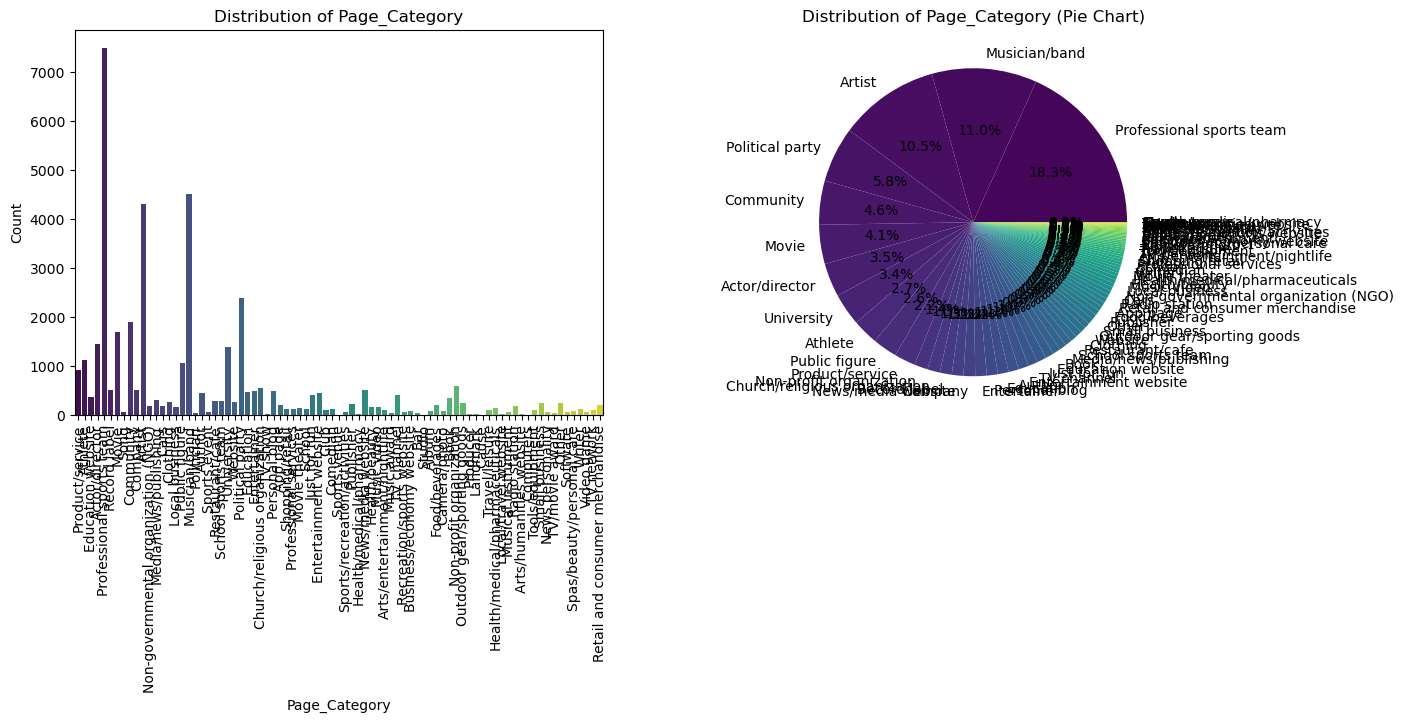


Column: Post_Promotion_Status


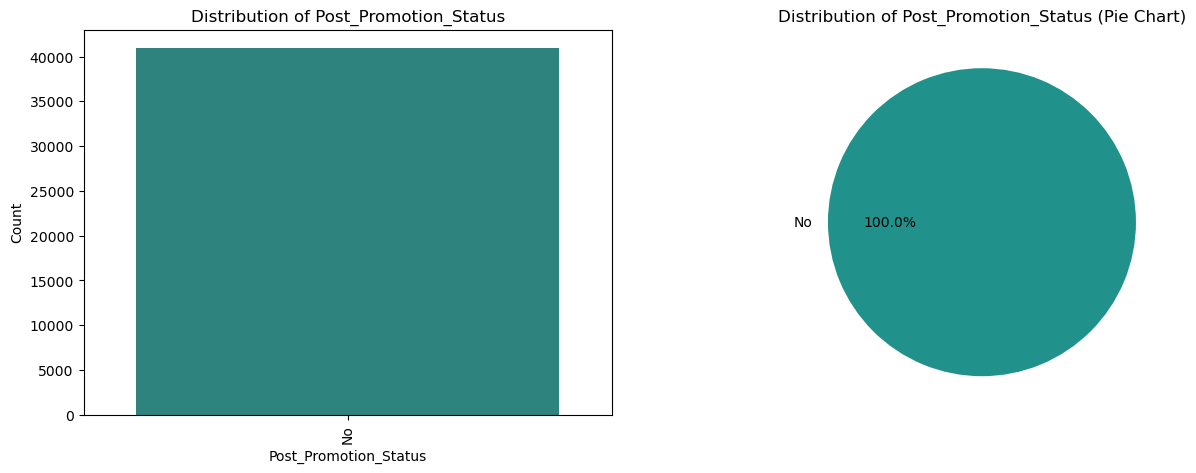


Column: Published_Day


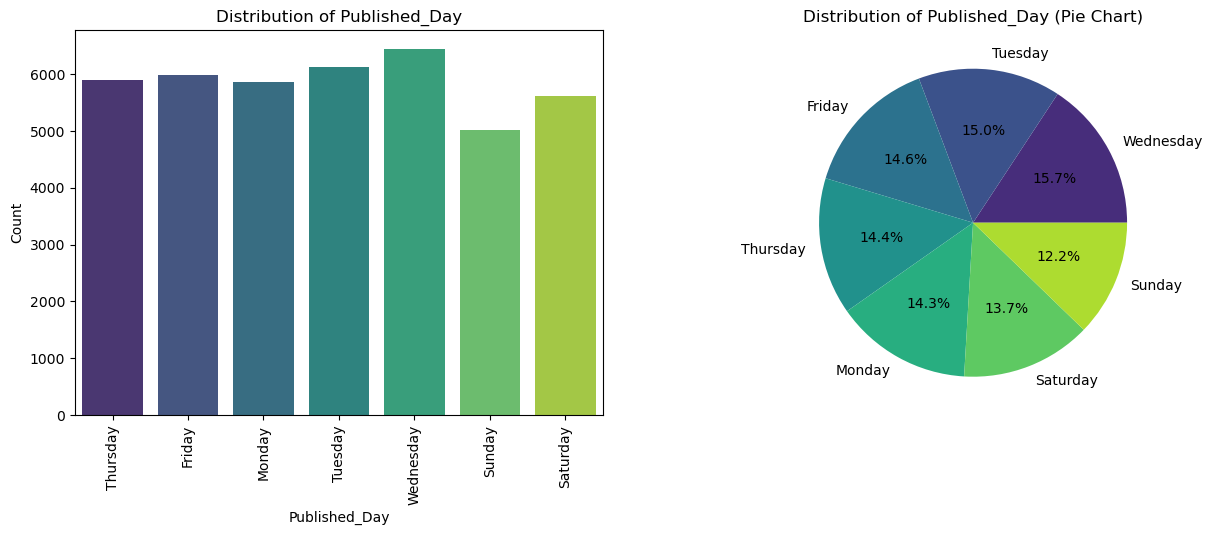


Column: BaseDate_Day


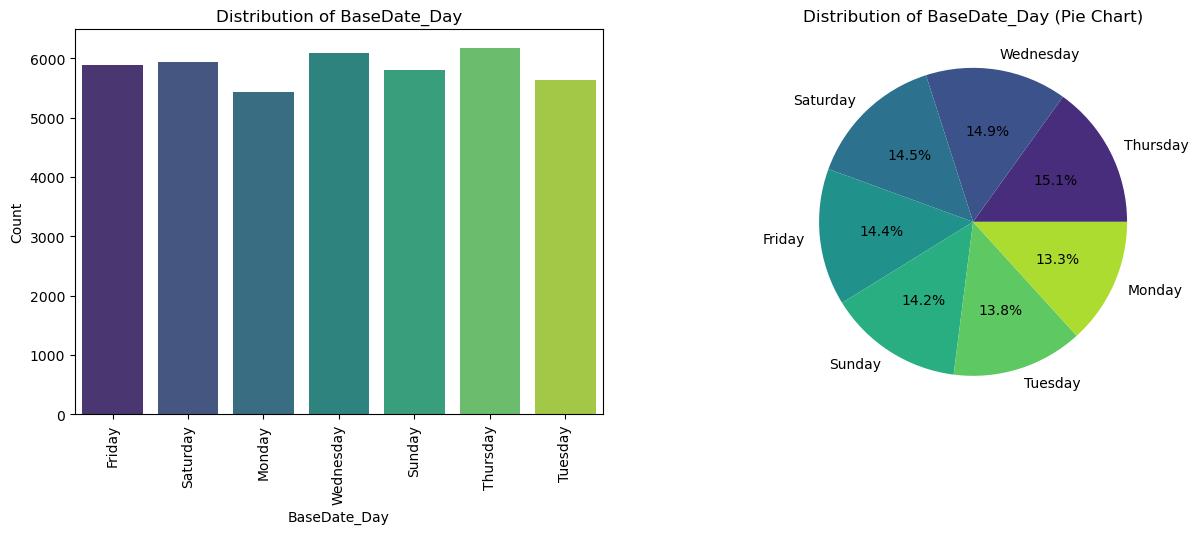

In [32]:
for col in cat_cols:
    print(f"\nColumn: {col}")
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    sns.countplot(x=data[col], palette="viridis")
    plt.xticks(rotation=90)
    plt.title(f"Distribution of {col}")
    plt.ylabel('Count')
    plt.xlabel(col)

    plt.subplot(1, 2, 2)
    data[col].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("viridis", len(data[col].unique())))
    plt.title(f"Distribution of {col} (Pie Chart)")
    plt.ylabel('')  
    plt.show()

In [33]:
num_cols = data.select_dtypes(include=np.number)
num_correlations = num_cols.corrwith(data["Target_Comment_Volume"])
num_correlations

Page_Popularity_Likes     0.058918
Page_Checkins             0.022981
Page_Talking_About        0.177329
Derived_1                 0.156940
Derived_2                 0.231437
Derived_3                 0.334984
Derived_4                 0.325365
Derived_5                 0.300229
Derived_6                 0.103345
Derived_7                 0.217766
Derived_8                 0.344826
Derived_9                 0.309460
Derived_10                0.297207
Derived_11                0.011900
Derived_12                0.229882
Derived_13                0.317866
Derived_14                0.276431
Derived_15                0.296788
Derived_16                0.164300
Derived_17                0.225914
Derived_18                0.333989
Derived_19                0.324371
Derived_20                0.295222
Derived_21               -0.214045
Derived_22                0.213878
Derived_23                0.162492
Derived_24               -0.019503
Derived_25                0.308801
CC1_Total_Comments  

In [34]:
anova_results = {}

for categorical_column in cat_cols:
    try:
        anova_result = stats.f_oneway(*[
            data[data[categorical_column] == category]['Target_Comment_Volume']
            for category in data[categorical_column].unique()
        ])

        anova_results[categorical_column] = {
            'F-statistic': anova_result.statistic,
            'p-value': anova_result.pvalue
        }
        
        print(f"\nCategorical Column: {categorical_column}")
        print(f"F-statistic: {anova_result.statistic}")
        print(f"p-value: {anova_result.pvalue}")
    
    except Exception as e:
        print(f"\nError with column {categorical_column}: {e}")
        
# Page category is significantly effective



Categorical Column: Page_Category
F-statistic: 11.36925490784768
p-value: 4.880401053724909e-139

Error with column Post_Promotion_Status: At least two samples are required; got 1.

Categorical Column: Published_Day
F-statistic: 3.805617943728628
p-value: 0.0008560158828618383

Categorical Column: BaseDate_Day
F-statistic: 3.6072376409120412
p-value: 0.0014075356255286858


In [35]:
numerical_corr_matrix = num_cols.corr()
numerical_corr_matrix

,Page_Popularity_Likes,Page_Checkins,Page_Talking_About,Derived_1,Derived_2,Derived_3,Derived_4,Derived_5,Derived_6,Derived_7,...,CC1_Total_Comments,CC2_Comments_Last_24h,CC3_Comments_48_to_24h,CC4_Comments_First_24h,CC5_CC2_CC3_Difference,Base_Time,Post_Length,Post_Share_Count,H_Local,Target_Comment_Volume
Page_Popularity_Likes,1.000000,0.044838,0.623436,0.059575,0.158716,0.166424,0.145216,0.174597,0.015750,0.182906,...,0.105623,0.077773,0.071448,0.104063,0.009764,-0.005713,-0.003509,0.331114,-0.021676,0.058918
Page_Checkins,0.044838,1.000000,0.166848,-0.002830,0.169241,0.154965,0.121731,0.178411,-0.003997,0.201238,...,0.098350,0.061608,0.064702,0.101212,0.001620,0.004768,-0.005189,0.052569,-0.014527,0.022981
Page_Talking_About,0.623436,0.166848,1.000000,0.181431,0.482027,0.518602,0.455485,0.541043,0.059709,0.509272,...,0.329137,0.251527,0.217937,0.329396,0.041487,-0.024578,-0.011251,0.443296,-0.107346,0.177329
Derived_1,0.059575,-0.002830,0.181431,1.000000,0.127578,0.474401,0.551732,0.202030,0.610646,0.087507,...,0.301085,0.212254,0.156582,0.289571,0.055628,0.003993,-0.010387,0.052372,-0.046697,0.156940
Derived_2,0.158716,0.169241,0.482027,0.127578,1.000000,0.706991,0.574632,0.895088,0.045731,0.851274,...,0.448703,0.321795,0.303869,0.452099,0.034178,-0.012282,0.007127,0.127578,-0.056577,0.231437
Derived_3,0.166424,0.154965,0.518602,0.474401,0.706991,1.000000,0.963965,0.894528,0.222305,0.661041,...,0.634662,0.455030,0.420782,0.633358,0.055044,-0.009081,-0.003967,0.149472,-0.076799,0.334984
Derived_4,0.145216,0.121731,0.455485,0.551732,0.574632,0.963965,1.000000,0.765475,0.266496,0.525825,...,0.611792,0.435414,0.403087,0.608509,0.052335,-0.004930,-0.012023,0.133098,-0.067239,0.325365
Derived_5,0.174597,0.178411,0.541043,0.202030,0.895088,0.894528,0.765475,1.000000,0.062964,0.814345,...,0.567724,0.410277,0.386216,0.569896,0.044485,-0.015811,0.004678,0.149004,-0.080926,0.300229
Derived_6,0.015750,-0.003997,0.059709,0.610646,0.045731,0.222305,0.266496,0.062964,1.000000,0.036907,...,0.141089,0.169255,0.046962,0.142800,0.103135,-0.006411,-0.004009,0.016971,-0.021428,0.103345
Derived_7,0.182906,0.201238,0.509272,0.087507,0.851274,0.661041,0.525825,0.814345,0.036907,1.000000,...,0.419541,0.323258,0.268923,0.426521,0.061743,-0.018905,0.008893,0.133686,-0.062032,0.217766


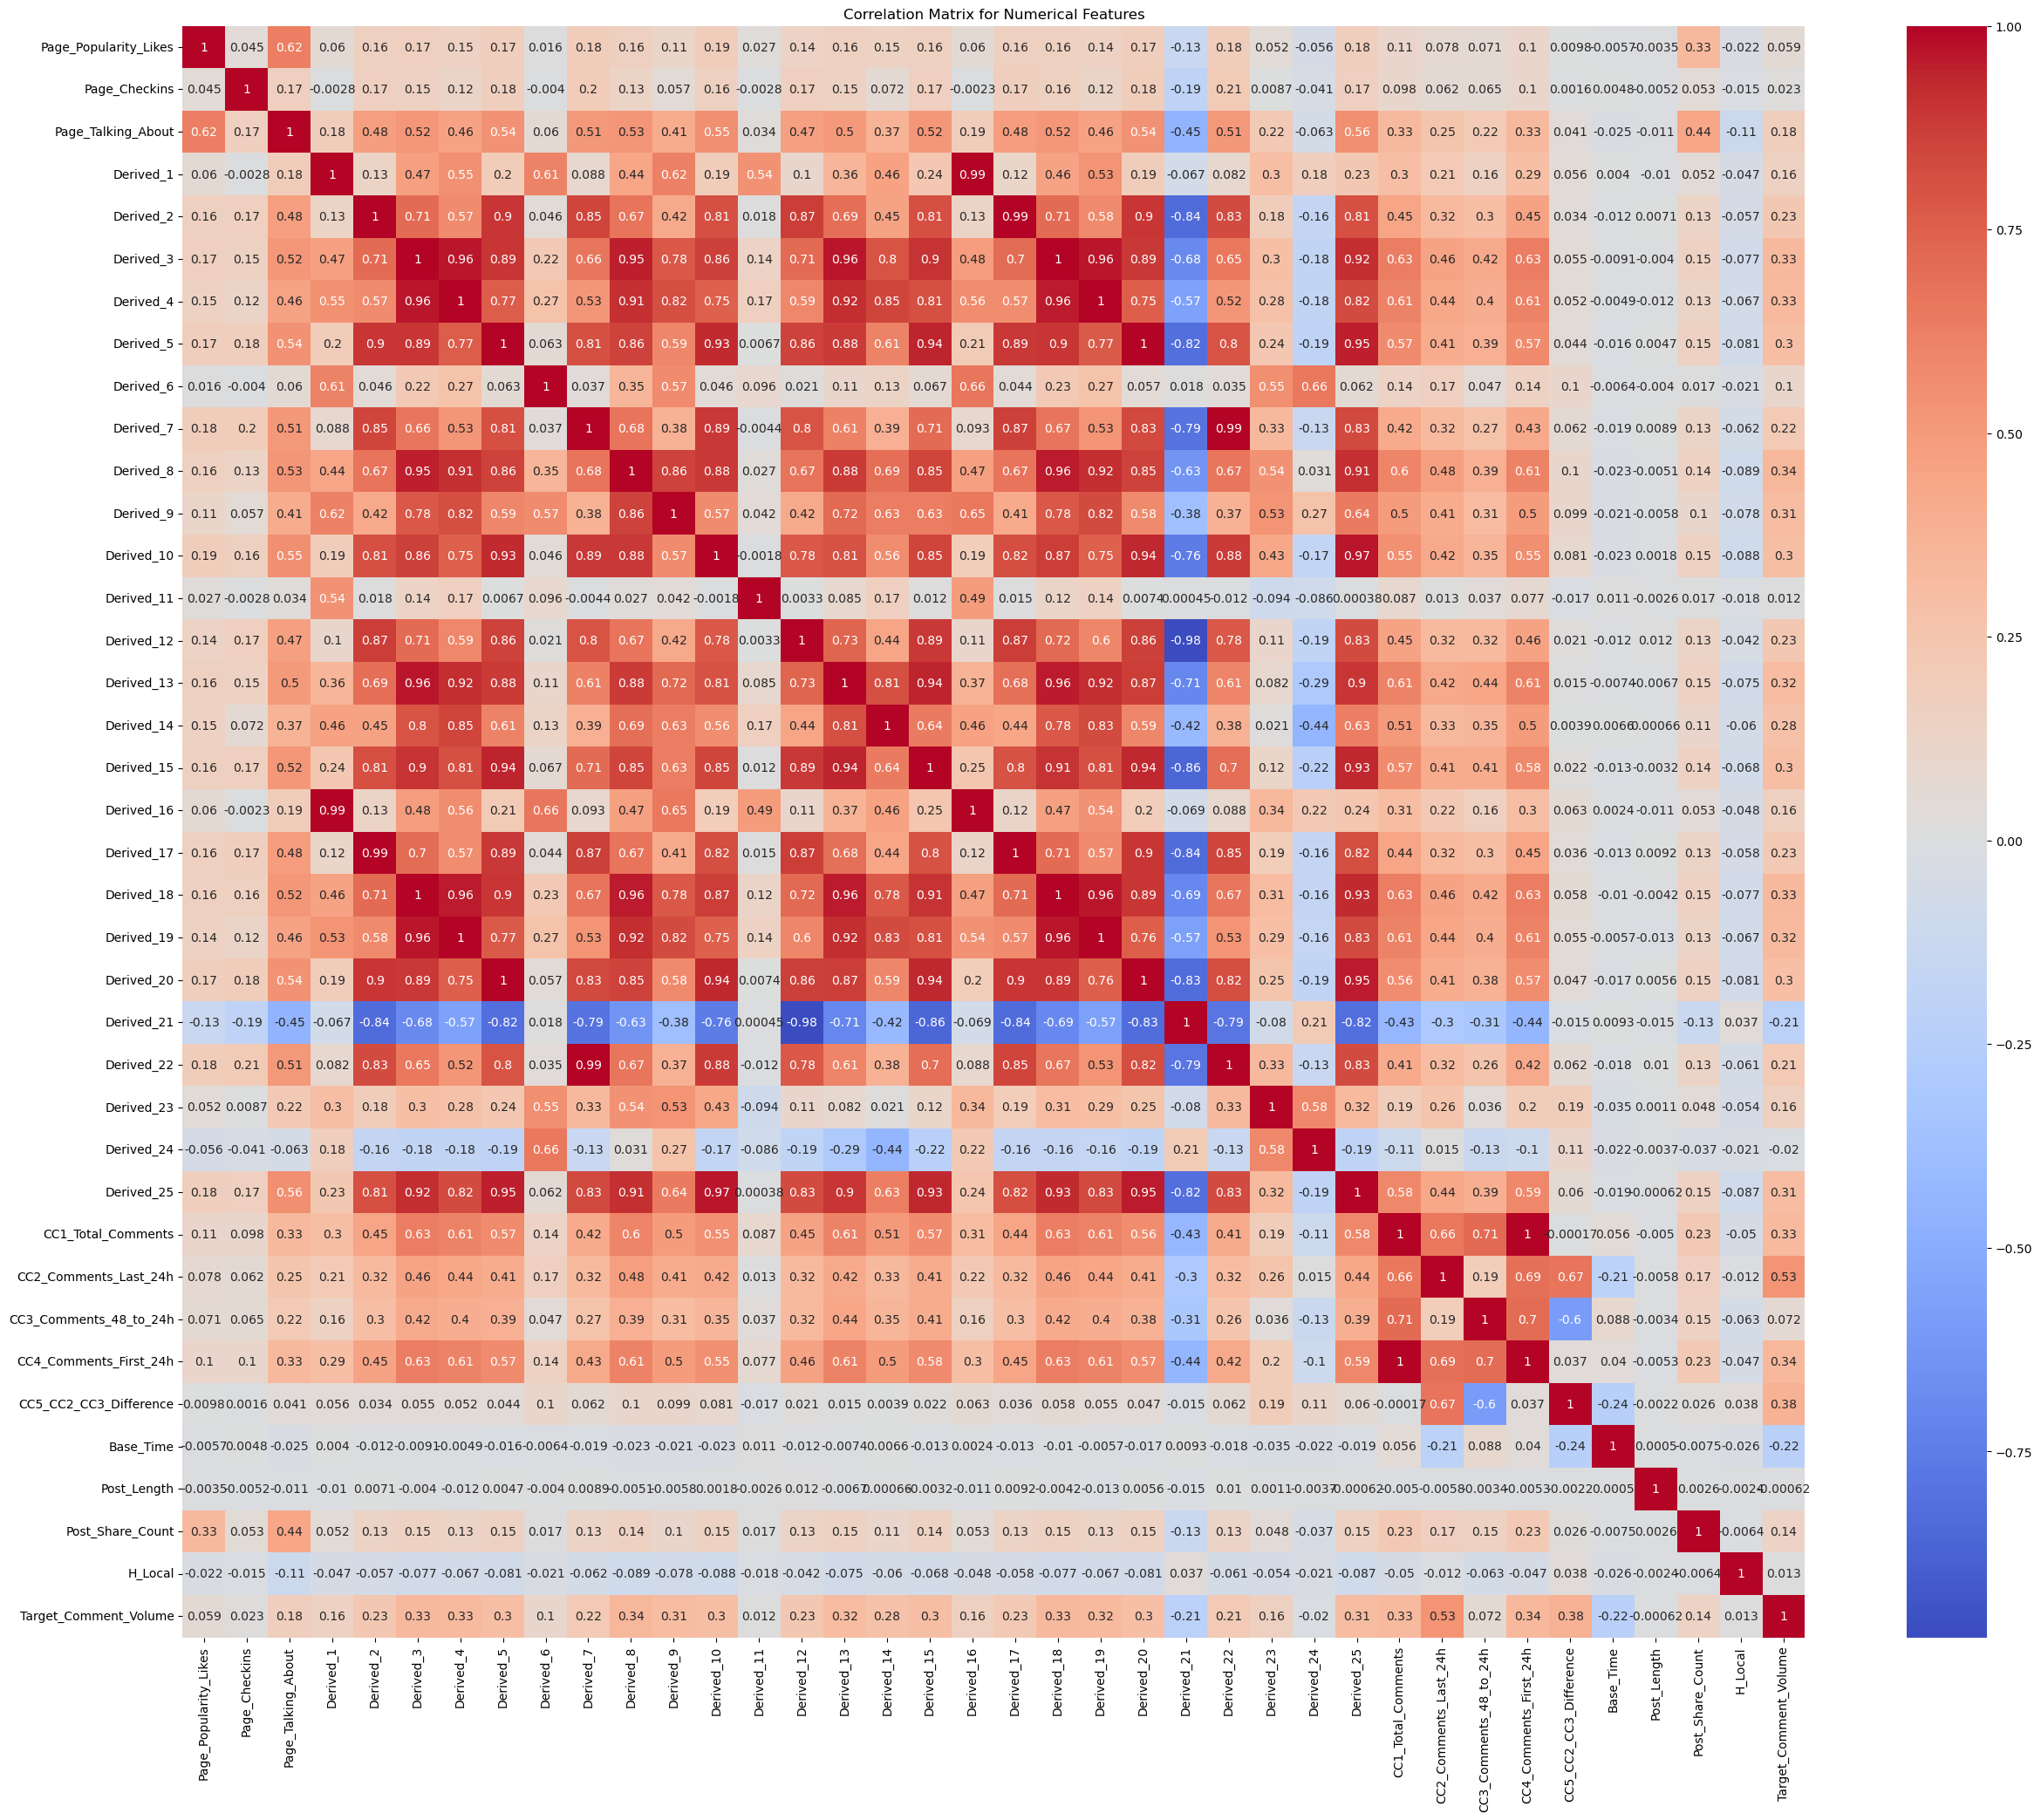

In [36]:
plt.figure(figsize=(30, 24))
sns.heatmap(numerical_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

In [37]:
high_corr_pairs = numerical_corr_matrix[(numerical_corr_matrix > 0.9) & (numerical_corr_matrix < 1.0)]
print(high_corr_pairs.dropna(how='all', axis=0).dropna(how='all', axis=1))

                        Derived_1  Derived_2  Derived_3  Derived_4  Derived_5  \
Derived_1                     NaN        NaN        NaN        NaN        NaN   
Derived_2                     NaN        NaN        NaN        NaN        NaN   
Derived_3                     NaN        NaN        NaN   0.963965        NaN   
Derived_4                     NaN        NaN   0.963965        NaN        NaN   
Derived_5                     NaN        NaN        NaN        NaN        NaN   
Derived_7                     NaN        NaN        NaN        NaN        NaN   
Derived_8                     NaN        NaN   0.950268   0.909301        NaN   
Derived_10                    NaN        NaN        NaN        NaN   0.927010   
Derived_13                    NaN        NaN   0.961877   0.921428        NaN   
Derived_15                    NaN        NaN   0.903472        NaN   0.943492   
Derived_16               0.994719        NaN        NaN        NaN        NaN   
Derived_17                  

Target_Binned
0           22578
1–10        13703
11–100       4079
101–1000      584
1000+           4
Name: count, dtype: int64


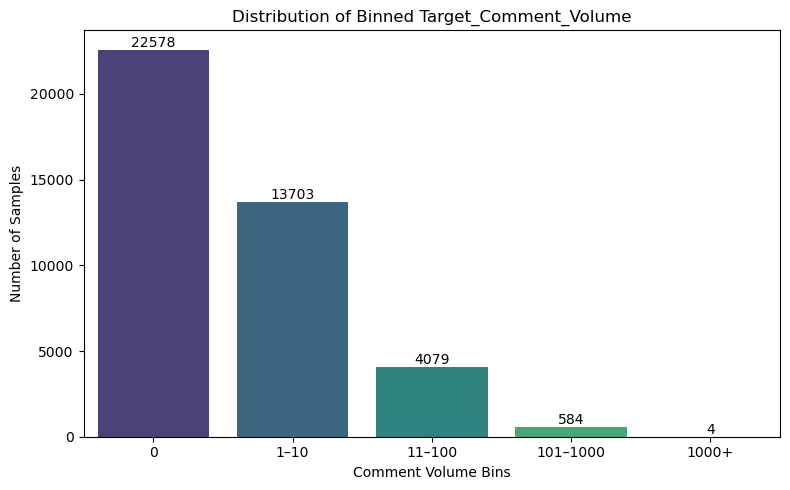

In [43]:
bins = [-1, 0, 10, 100, 1000, float('inf')]
labels = ['0', '1–10', '11–100', '101–1000', '1000+']

data['Target_Binned'] = pd.cut(data['Target_Comment_Volume'], bins=bins, labels=labels)

binned_counts = data['Target_Binned'].value_counts().sort_index()

print(binned_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x=binned_counts.index, y=binned_counts.values, palette='viridis')
plt.title('Distribution of Binned Target_Comment_Volume')
plt.xlabel('Comment Volume Bins')
plt.ylabel('Number of Samples')

# Optional: add counts on top of bars
for i, count in enumerate(binned_counts.values):
    plt.text(i, count + 2, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()